In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

## Load Data

In [ ]:
df = pd.read_csv("Traffic_volume.csv")
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description            date_time  traffic_volume
0     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds  2012-10-02 09:00:00            5545
1     NaN  289.36      0.0      0.0          75       Clouds       broken clouds  2012-10-02 10:00:00            4516
2     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 11:00:00            4767
3     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 12:00:00            5026
4     NaN  291.14      0.0      0.0          75       Clouds       broken clouds  2012-10-02 13:00:00            4918

## Data analysis

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [90]:
df.describe()

temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000

# Visualize numerical attributes

Text(0.5, 1.0, 'clouds_all')

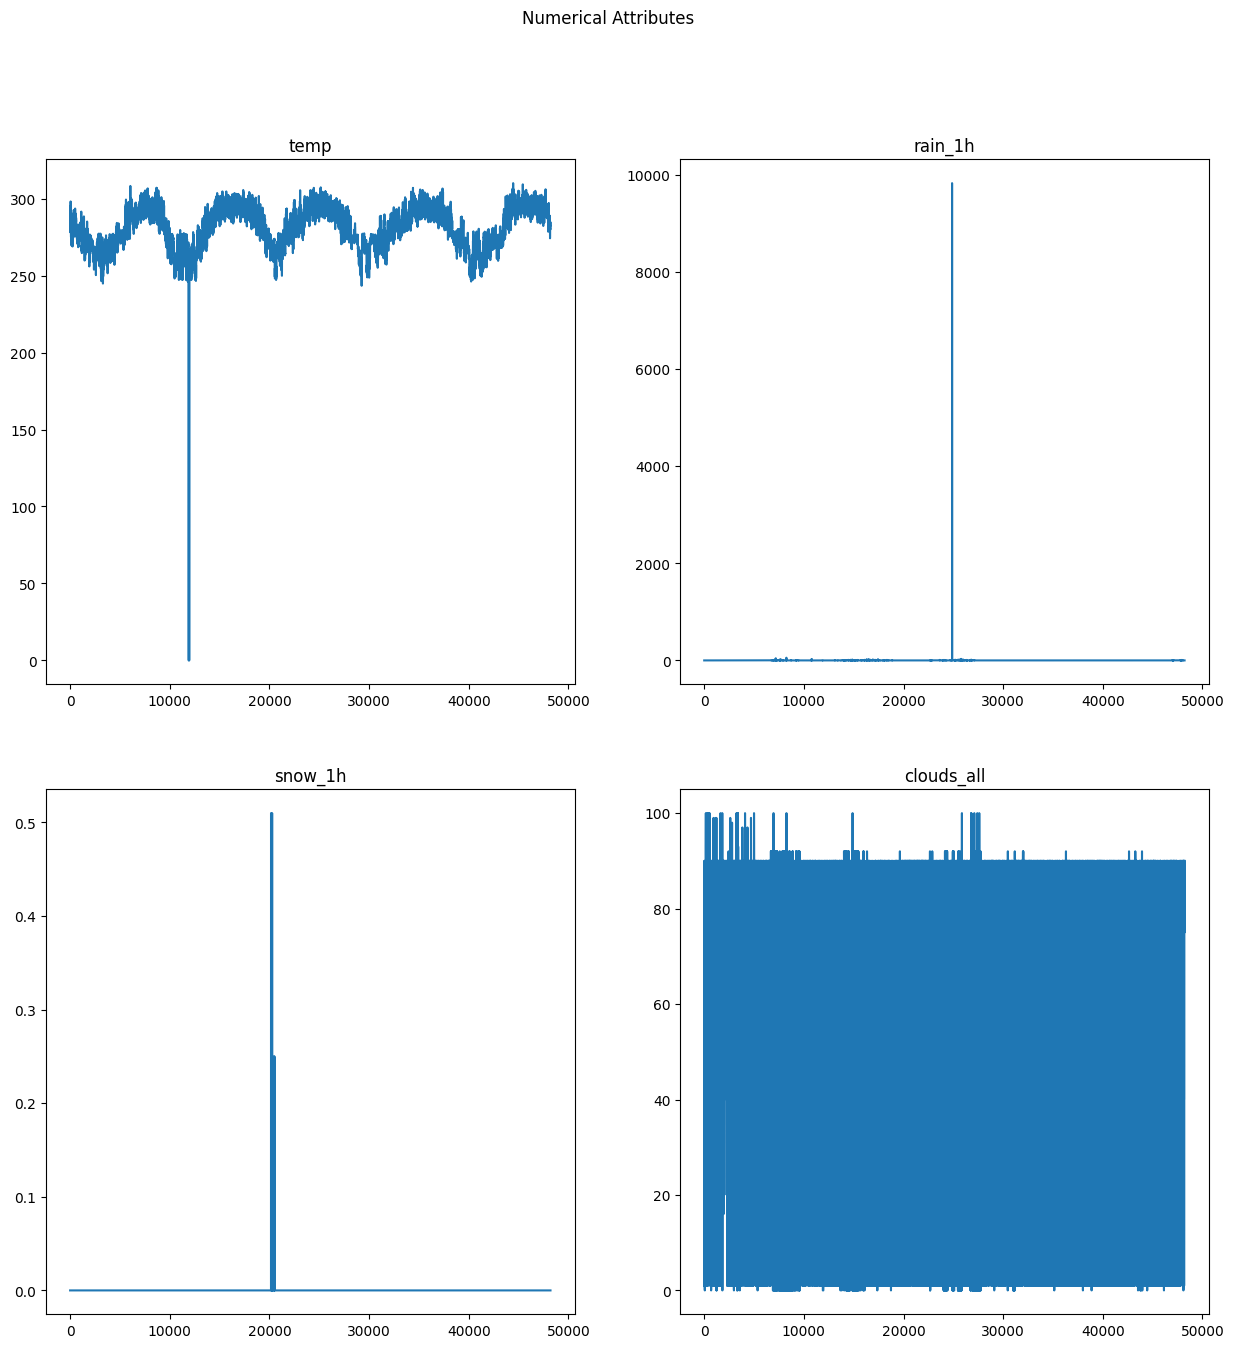

In [91]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Numerical Attributes')
ax[0, 0].plot(df.temp)
ax[0, 0].set_title('temp')
ax[0, 1].plot(df.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(df.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(df.clouds_all)
ax[1, 1].set_title('clouds_all')

Text(0.5, 1.0, 'traffic volume')

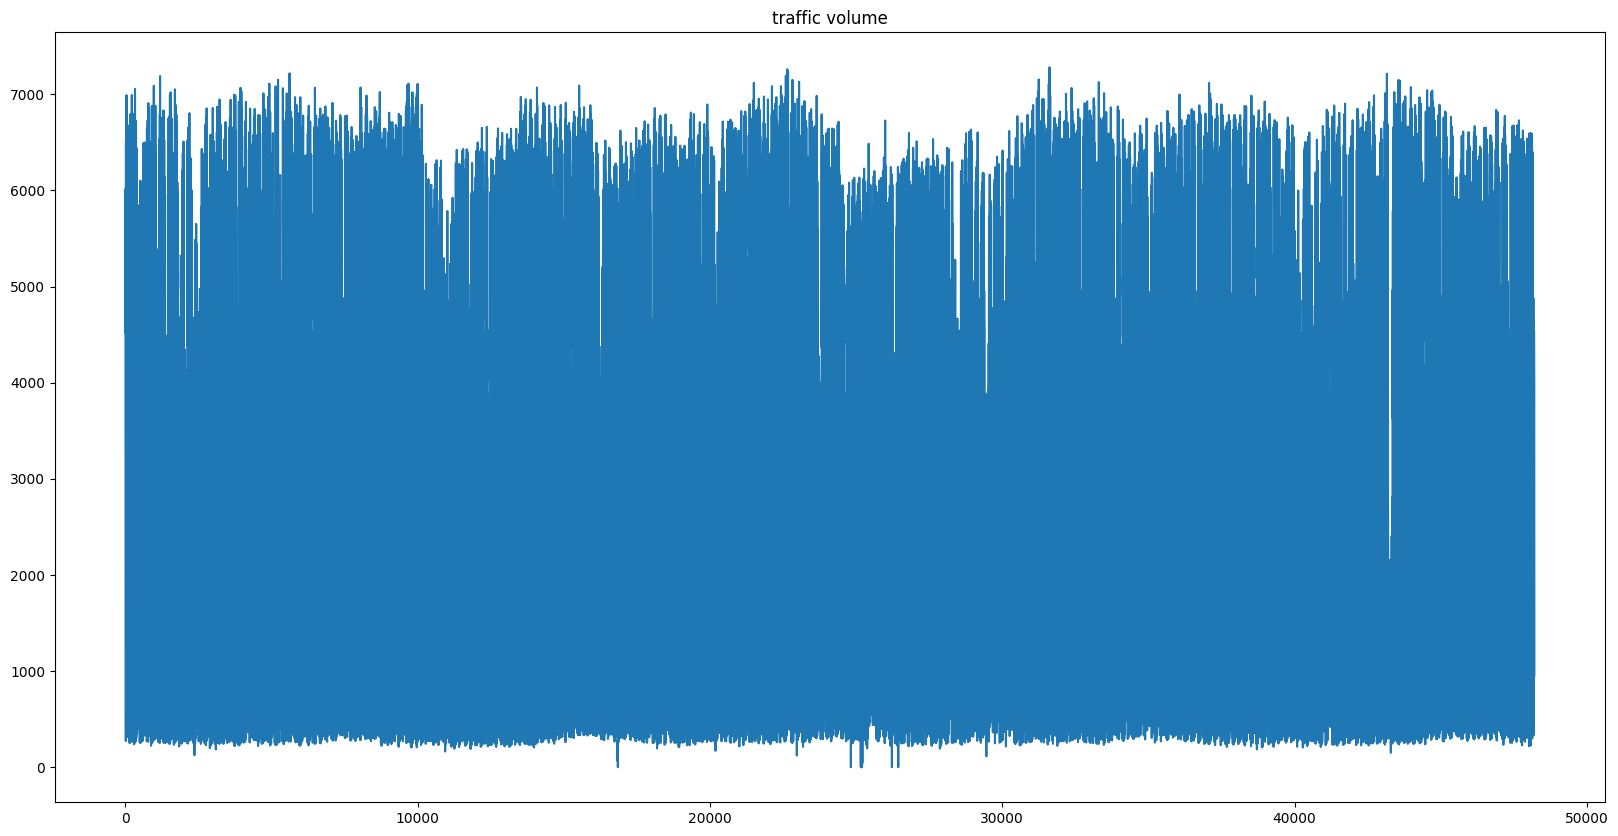

In [92]:
plt.plot(df.traffic_volume)
plt.title("traffic volume")

#### Explore categorical attributes

In [93]:
# categorical attributes unique values
print("holiday categories:", df.holiday.unique())
print("\nweather categories:", df.weather_main.unique())
print("\nweather description categories:", df.weather_description.unique())
print(len(df.holiday.unique()))
print(len(df.weather_main.unique()))
print(len(df.weather_description.unique()))

holiday categories: [nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']

weather categories: ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']

weather description categories: ['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light drizzle' 'li

In [94]:
df["holiday"].value_counts()

holiday
Labor Day                    7
Christmas Day                6
Thanksgiving Day             6
Martin Luther King Jr Day    6
New Years Day                6
Veterans Day                 5
Columbus Day                 5
Memorial Day                 5
Washingtons Birthday         5
State Fair                   5
Independence Day             5
Name: count, dtype: int64

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

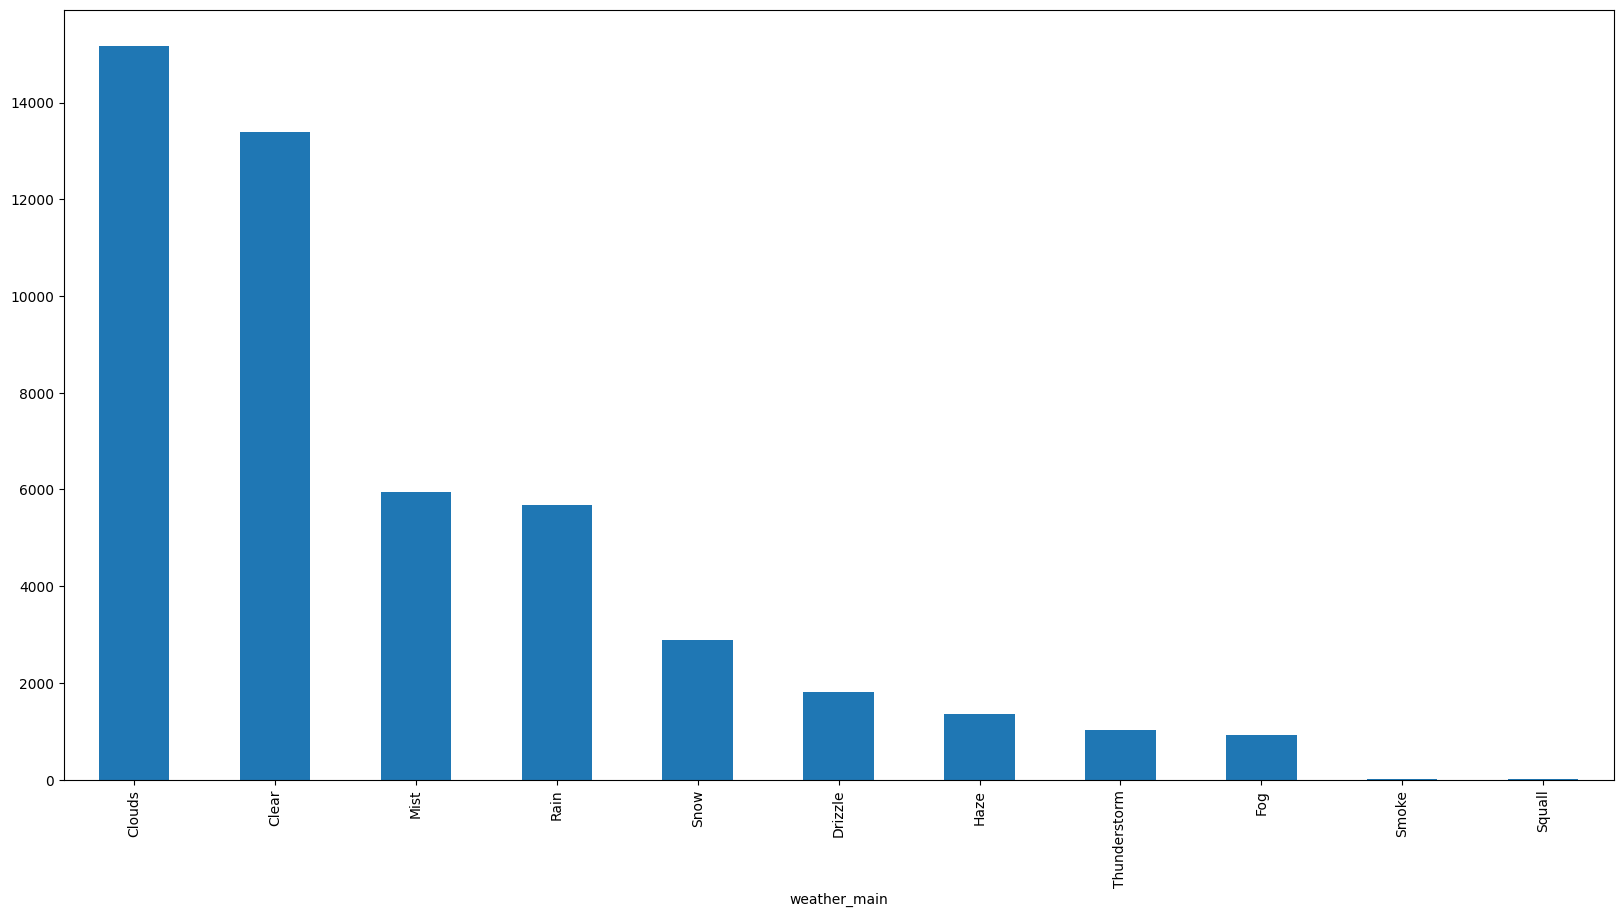

In [95]:
df["weather_main"].value_counts().plot(kind='bar')
df["weather_main"].value_counts()

In [96]:
df["weather_description"].value_counts()

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

In [97]:
rain = df.rain_1h[df.rain_1h<100]

<Axes: >

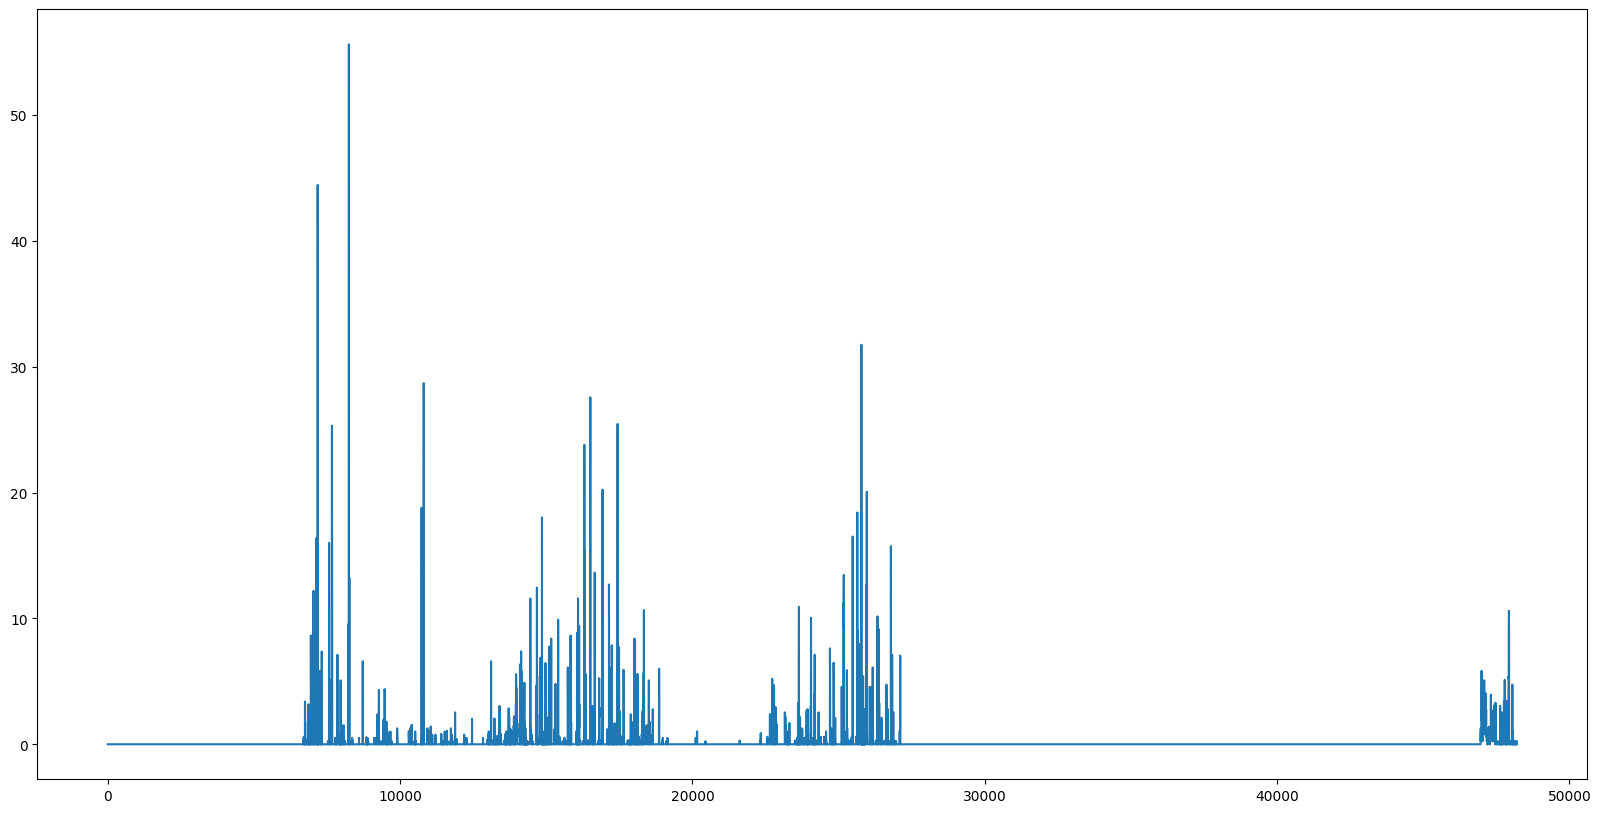

In [98]:
rain.plot()

## Data processing

In [99]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description            date_time  traffic_volume
0     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds  2012-10-02 09:00:00            5545
1     NaN  289.36      0.0      0.0          75       Clouds       broken clouds  2012-10-02 10:00:00            4516
2     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 11:00:00            4767
3     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 12:00:00            5026
4     NaN  291.14      0.0      0.0          75       Clouds       broken clouds  2012-10-02 13:00:00            4918

In [183]:
# Replace NaN and 'None' in the 'holiday' column with a specific value and then set holiday_bool
df["holiday_bool"] = np.where(df.holiday.isna() | (df.holiday == "None"), 0, 1)
df["holiday_bool"] = df["holiday_bool"].astype('int8')

AttributeError: 'DataFrame' object has no attribute 'holiday'

In [101]:
# change temp from kelvin to celsius (for better readability)
df['temp_c'] = df['temp'] - 273.15


In [102]:
len(df)

48204

In [103]:
# drop outliers

df.drop(df[df.temp_c < -50].index, inplace=True)
df.drop(df[df.rain_1h > 9000].index, inplace=True)


In [104]:
len(df)

48193

Text(0.5, 1.0, 'clouds_all')

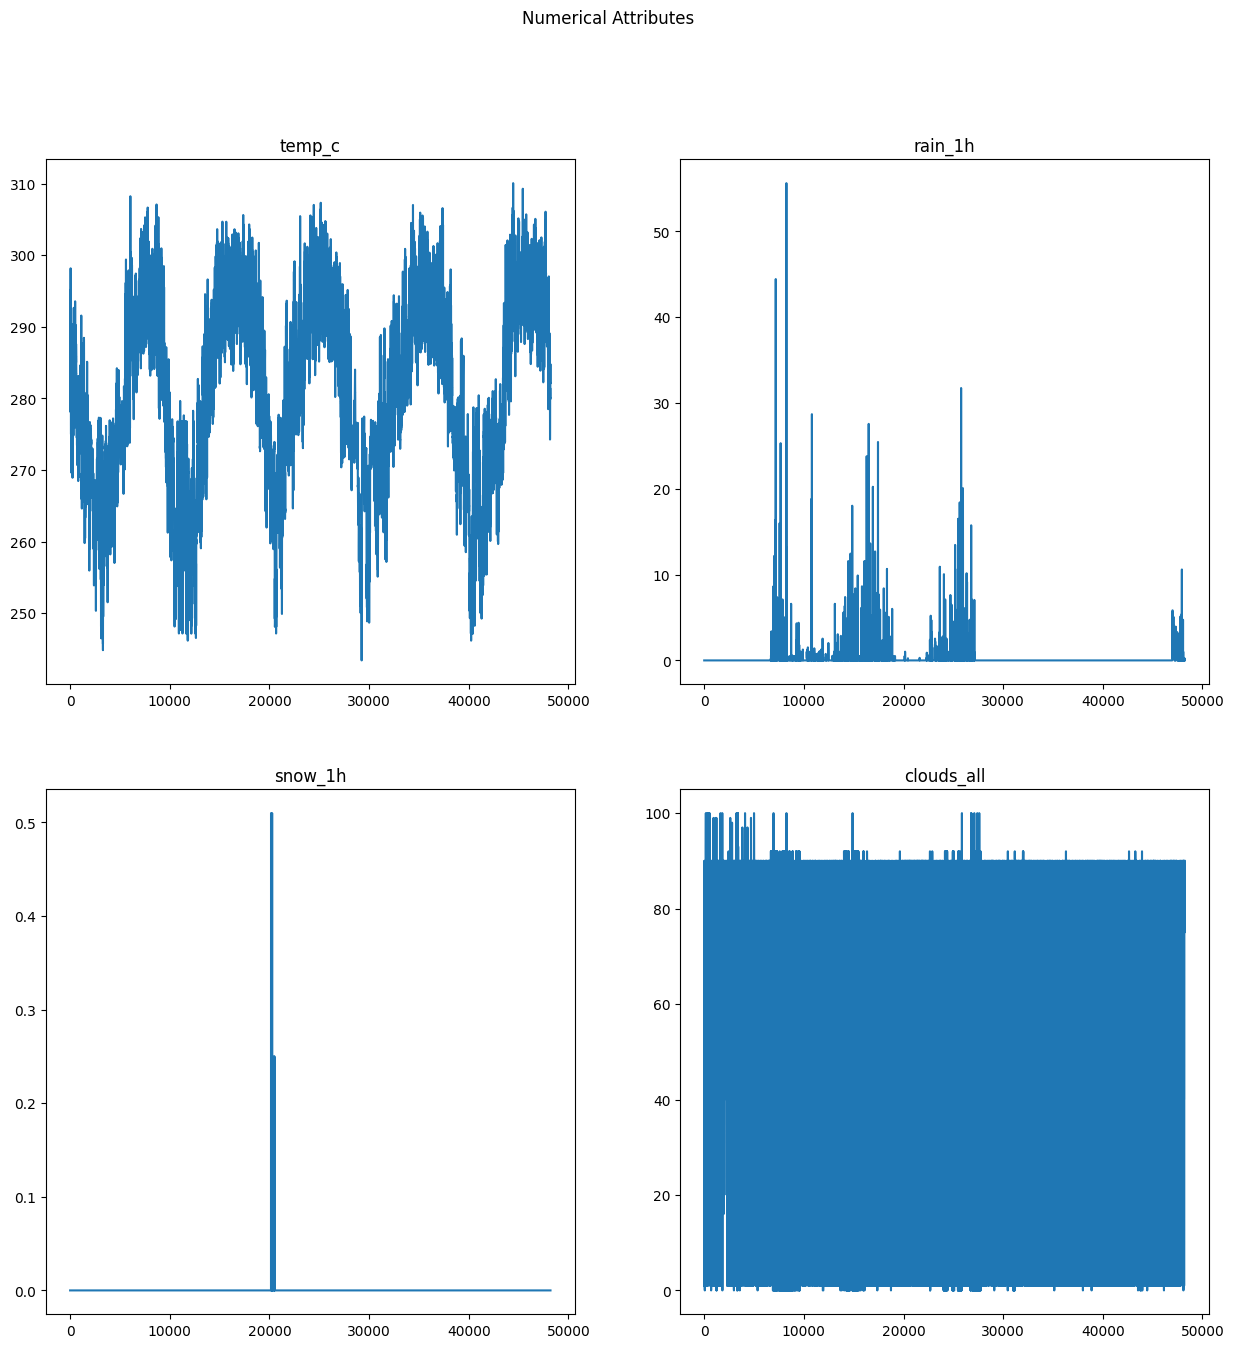

In [105]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Numerical Attributes')
ax[0, 0].plot(df.temp)
ax[0, 0].set_title('temp_c')
ax[0, 1].plot(df.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(df.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(df.clouds_all)
ax[1, 1].set_title('clouds_all')

In [106]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description            date_time  traffic_volume  holiday_bool  temp_c
0     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds  2012-10-02 09:00:00            5545             0   15.13
1     NaN  289.36      0.0      0.0          75       Clouds       broken clouds  2012-10-02 10:00:00            4516             0   16.21
2     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 11:00:00            4767             0   16.43
3     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 12:00:00            5026             0   16.98
4     NaN  291.14      0.0      0.0          75       Clouds       broken clouds  2012-10-02 13:00:00            4918             0   17.99

In [107]:
# Convert weather_main to a categorical type with specific categories
df["weather_main_cat"] = pd.Categorical(df["weather_main"], categories=df.weather_main.unique())

# One-hot encode the categorical column (drop first to avoid dummy variable trap if needed)
dummy_weather = pd.get_dummies(df["weather_main_cat"], prefix="weather_main")

# Ensure columns are not duplicated during concatenation
df = pd.concat([df.drop(columns=["weather_main_cat"], errors="ignore"), dummy_weather], axis=1)

# Drop duplicate columns if they exist (as a safeguard)
df = df.loc[:, ~df.columns.duplicated()]

# Display the DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48193 entries, 0 to 48203
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   holiday                    61 non-null     object 
 1   temp                       48193 non-null  float64
 2   rain_1h                    48193 non-null  float64
 3   snow_1h                    48193 non-null  float64
 4   clouds_all                 48193 non-null  int64  
 5   weather_main               48193 non-null  object 
 6   weather_description        48193 non-null  object 
 7   date_time                  48193 non-null  object 
 8   traffic_volume             48193 non-null  int64  
 9   holiday_bool               48193 non-null  int8   
 10  temp_c                     48193 non-null  float64
 11  weather_main_Clouds        48193 non-null  bool   
 12  weather_main_Clear         48193 non-null  bool   
 13  weather_main_Rain          48193 non-null  bool   


In [108]:
import pandas as pd

# Set display options to show the full dataset
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Don't truncate column values
pd.set_option('expand_frame_repr', False)  # Prevent wrapping to a new line


In [109]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description            date_time  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke
0     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds  2012-10-02 09:00:00            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False
1     NaN  289.36      0.0      0.0          75       Clouds       broken clouds  2012-10-02 10:00:00            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False
2     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 11:00:00            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False
3     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds  2012-10-02 12:00:00            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False
4     NaN  291.14      0.0      0.0          75       Clouds       broken clouds  2012-10-02 13:00:00            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False

In [110]:
# aggregate rows with same date-time
df_agg = df.groupby('date_time',as_index=False).agg('max')

In [111]:
df_agg.head()

date_time holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke
0  2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False
1  2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75       Clouds       broken clouds            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False
2  2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False
3  2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False
4  2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75       Clouds       broken clouds            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False

In [112]:
# convert date_time column to datetime format
df_agg['date_time'] = pd.to_datetime(df_agg['date_time'])

In [113]:
df_agg.head()

date_time holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke
0 2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False
1 2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75       Clouds       broken clouds            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False
2 2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False
3 2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False
4 2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75       Clouds       broken clouds            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False

In [114]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40564 entries, 0 to 40563
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  40564 non-null  datetime64[ns]
 1   holiday                    53 non-null     object        
 2   temp                       40564 non-null  float64       
 3   rain_1h                    40564 non-null  float64       
 4   snow_1h                    40564 non-null  float64       
 5   clouds_all                 40564 non-null  int64         
 6   weather_main               40564 non-null  object        
 7   weather_description        40564 non-null  object        
 8   traffic_volume             40564 non-null  int64         
 9   holiday_bool               40564 non-null  int8          
 10  temp_c                     40564 non-null  float64       
 11  weather_main_Clouds        40564 non-null  bool          
 12  weat

date_time holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke  hour
0 2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False     9
1 2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75       Clouds       broken clouds            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False    10
2 2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False    11
3 2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False    12
4 2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75       Clouds       broken clouds            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False    13

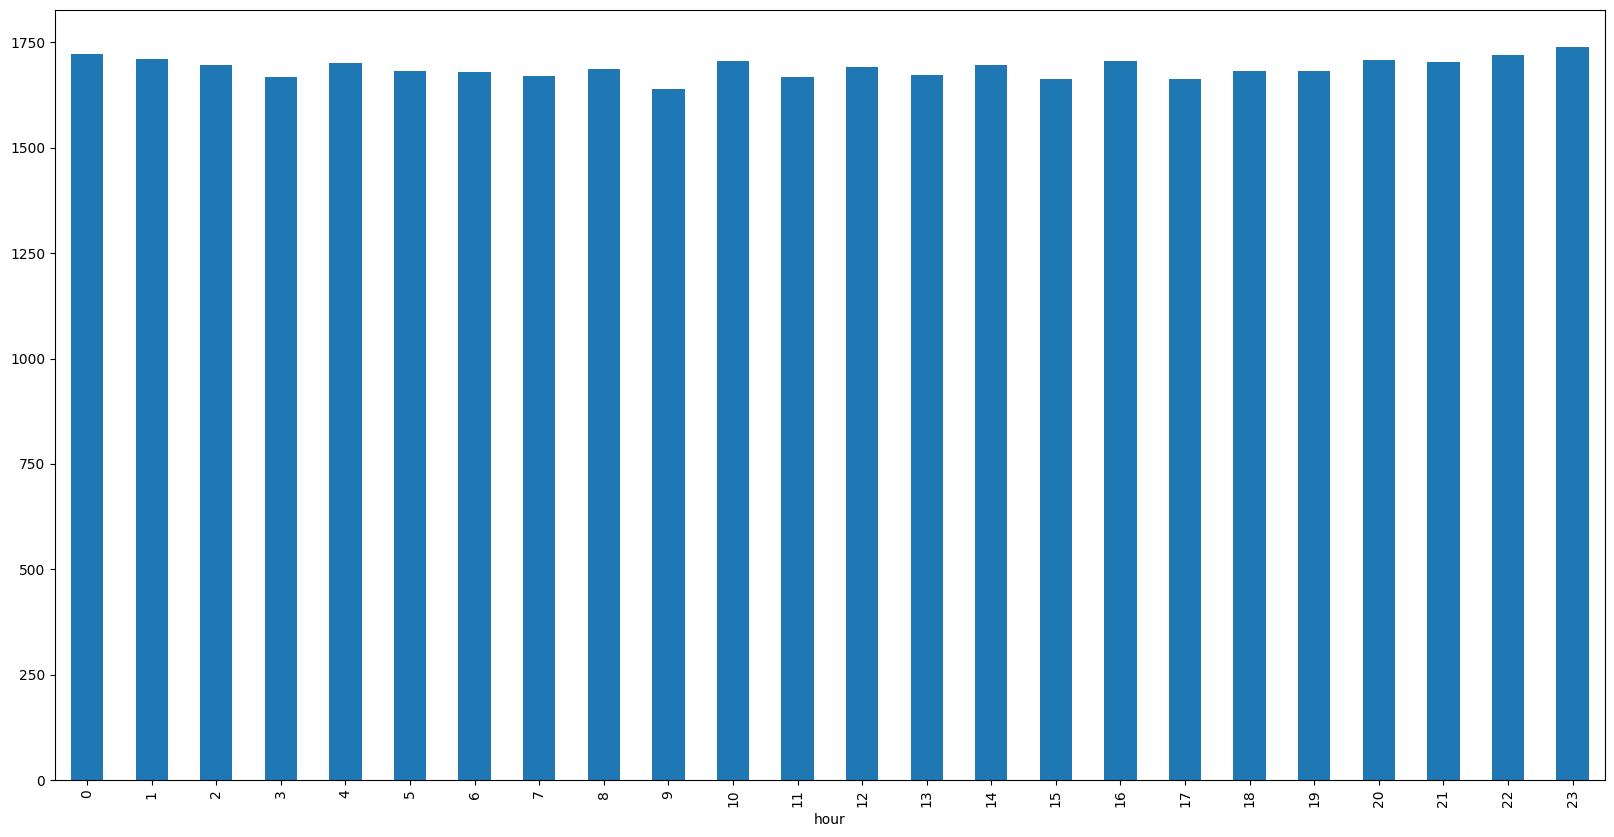

In [115]:
# create column with hours from date_time
df_agg['hour'] = df_agg['date_time'].dt.hour
df_agg['hour'].value_counts().sort_index().plot(kind='bar')
df_agg.head()

date_time holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke  hour  day_of_week
0  2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False     9            1
1  2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75       Clouds       broken clouds            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False    10            1
2  2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False    11            1
3  2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False    12            1
4  2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75       Clouds       broken clouds            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False    13            1
5  2012-10-02 14:00:00     NaN  291.72      0.0      0.0           1        Clear        sky is clear            5181             0   18.57                False                True              False                 False              False              False             False                      False              False                False               False    14            1
6  2012-10-02 15:00:00     NaN  293.17      0.0      0.0           1        Clear        sky is clear            5584             0   20.02                False                True              False                 False              False              False             False                      False              False                False               False    15            1
7  2012-10-02 16:00:00     NaN  293.86      0.0      0.0           1        Clear        sky is clear            6015             0   20.71                False                True              False                 False              False              False             False                      False              False                False               False    16            1
8  2012-10-02 17:00:00     NaN  294.14      0.0      0.0          20       Clouds          few clouds            5791             0   20.99                 True               False              False                 False              False              False             False                      False              False                False               False    17            1
9  2012-10-02 18:00:00     NaN  293.10      0.0      0.0          20       Clouds          few clouds            4770             0   19.95                 True             

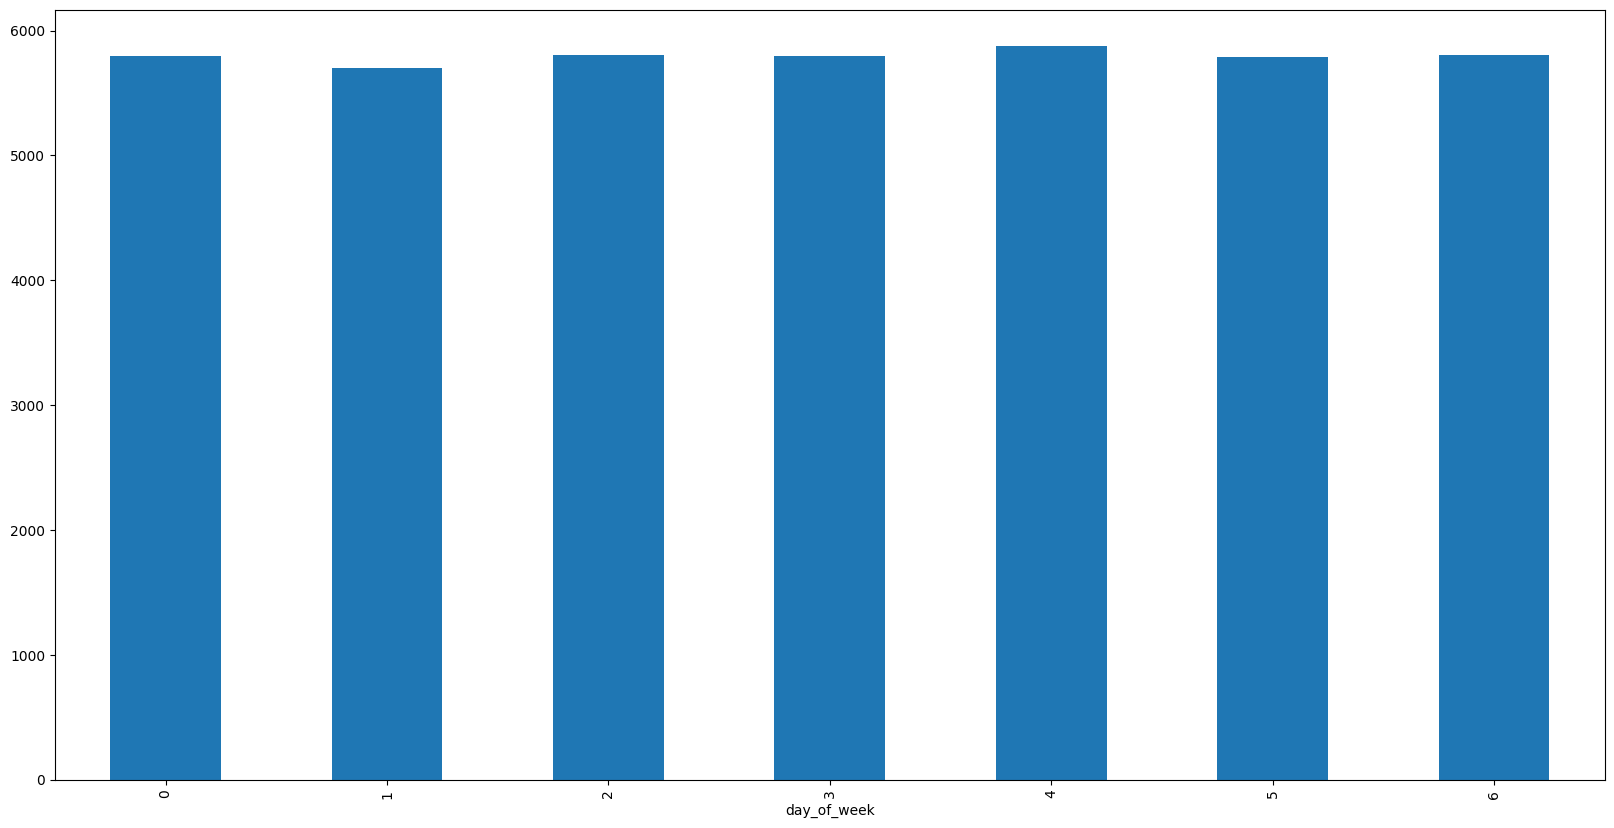

In [116]:
# create column with day of the week from date_time
df_agg['day_of_week'] = df_agg['date_time'].dt.dayofweek
df_agg['day_of_week'].value_counts().sort_index().plot(kind='bar')
df_agg.head(20)

<Axes: xlabel='month'>

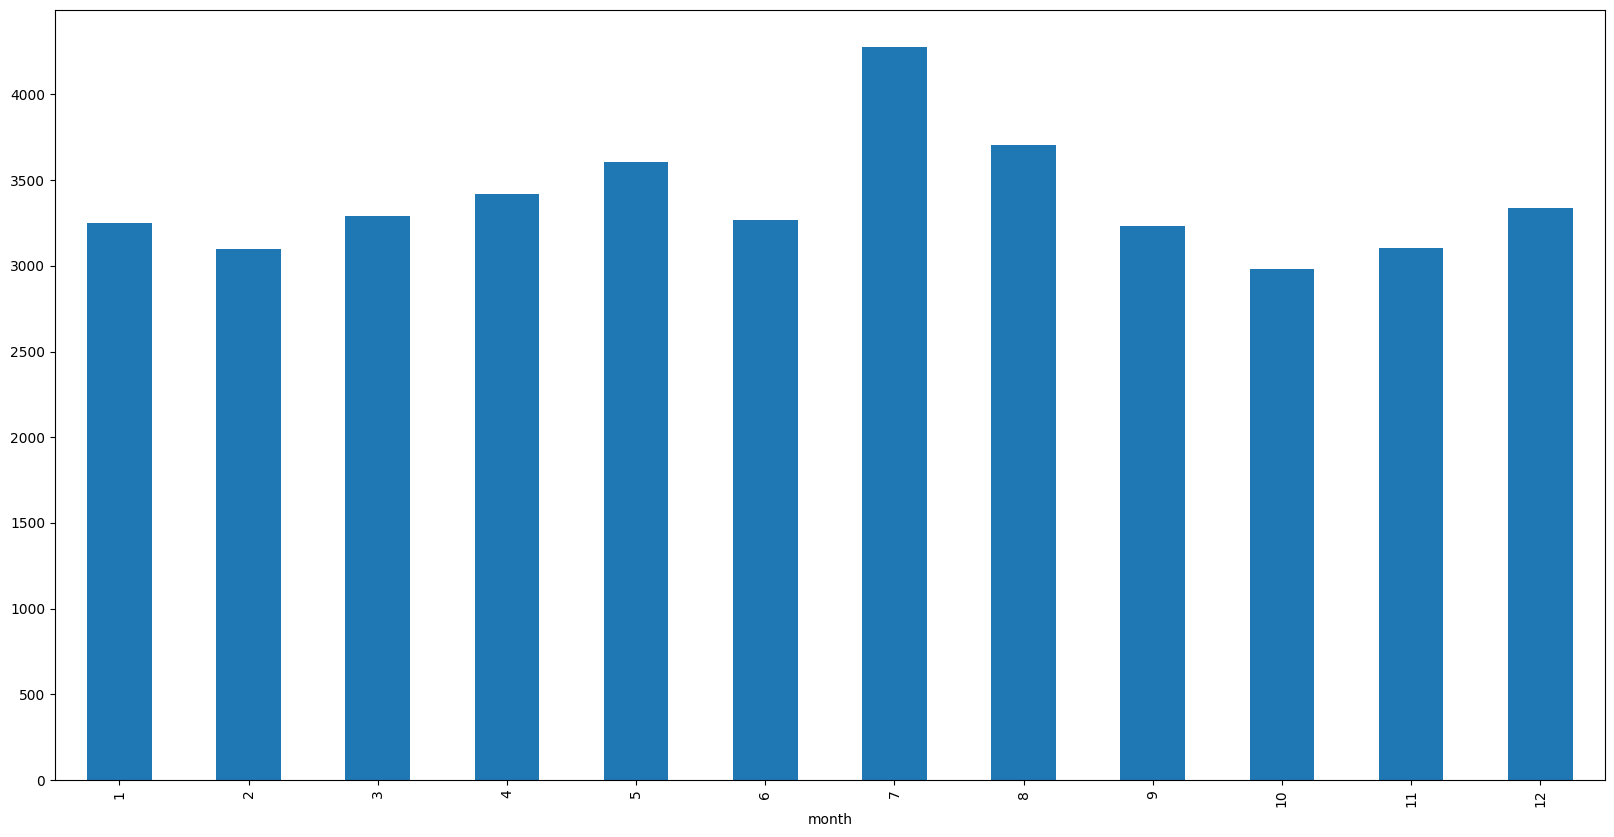

In [117]:
# create column with month from date_time
df_agg['month'] = df_agg['date_time'].dt.month
df_agg['month'].value_counts().sort_index().plot(kind='bar')

In [118]:
df_agg.head()

date_time holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke  hour  day_of_week  month
0 2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False     9            1     10
1 2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75       Clouds       broken clouds            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False    10            1     10
2 2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False    11            1     10
3 2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False    12            1     10
4 2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75       Clouds       broken clouds            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False    13            1     10

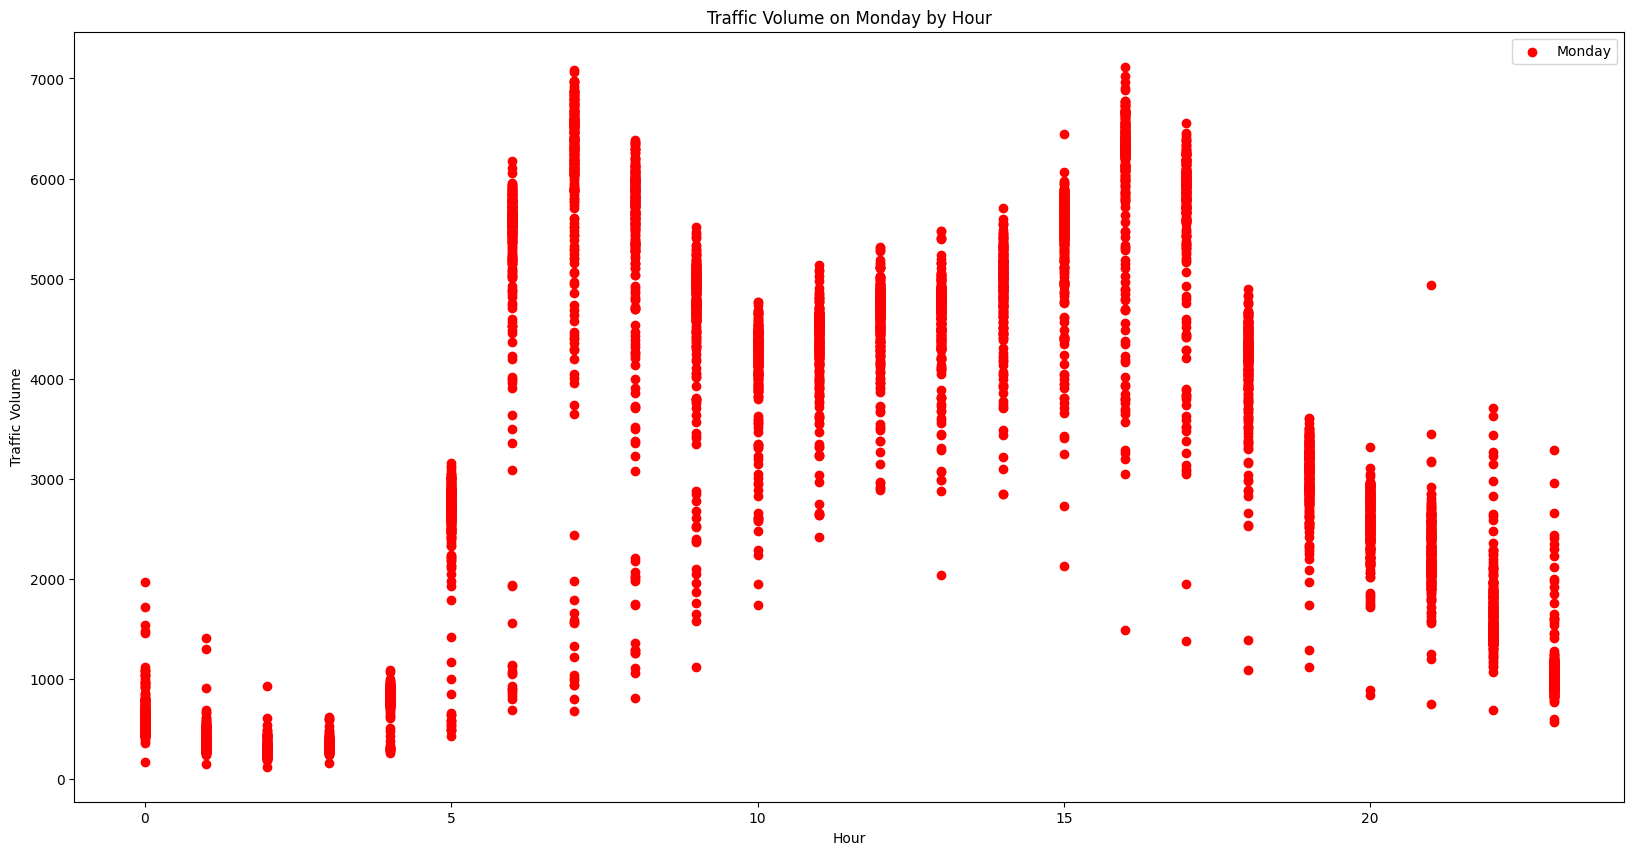

In [119]:
# Filter data for Monday
monday_data = df_agg[df_agg['day_of_week'] == 0]

# Scatter plot for Monday
plt.scatter(monday_data['hour'], monday_data['traffic_volume'], color='r', label='Monday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume on Monday by Hour')
plt.show()


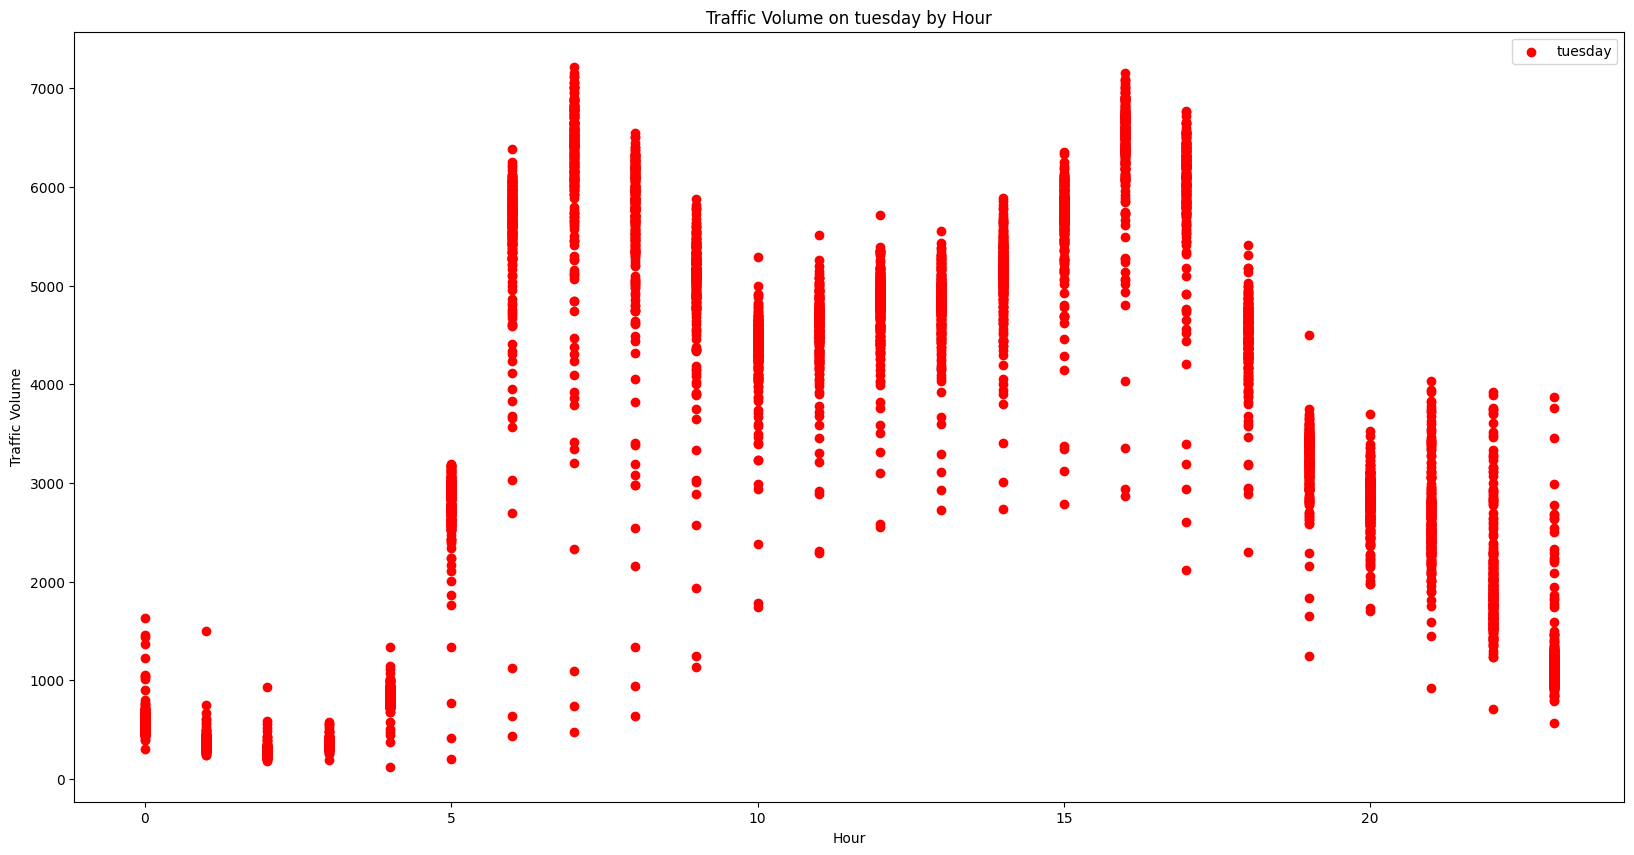

In [120]:
# Filter data for Monday
tuesday_data = df_agg[df_agg['day_of_week'] == 1]

# Scatter plot for Monday
plt.scatter(tuesday_data['hour'], tuesday_data['traffic_volume'], color='r', label='tuesday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume on tuesday by Hour')
plt.show()


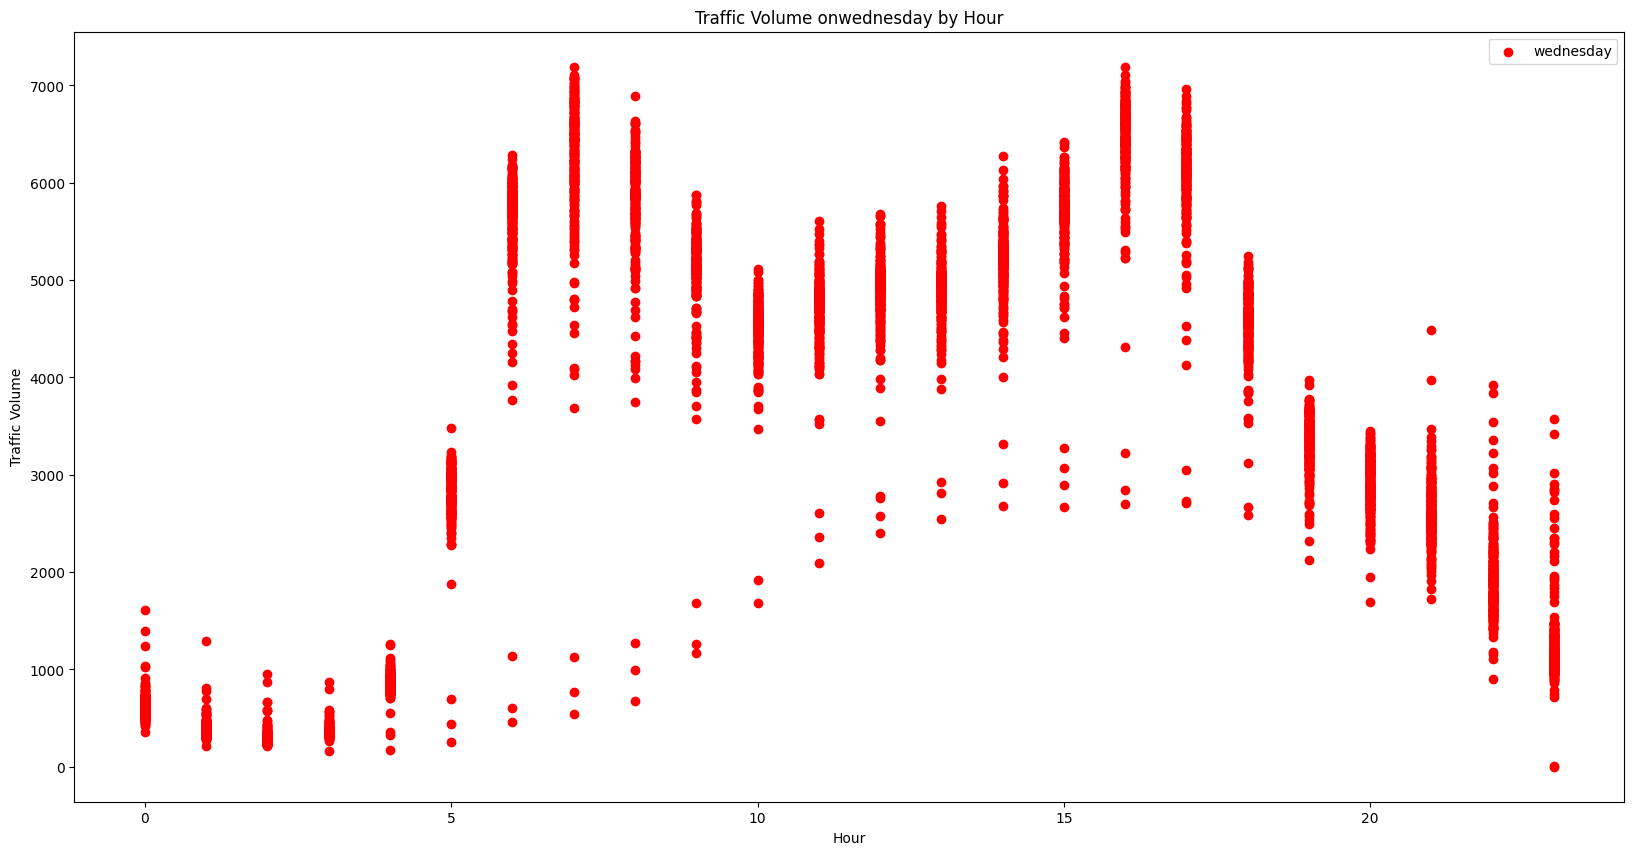

In [121]:
# Filter data for Monday
wednesday_data = df_agg[df_agg['day_of_week'] == 2]

# Scatter plot for Monday
plt.scatter(wednesday_data['hour'], wednesday_data['traffic_volume'], color='r', label='wednesday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume onwednesday by Hour')
plt.show()


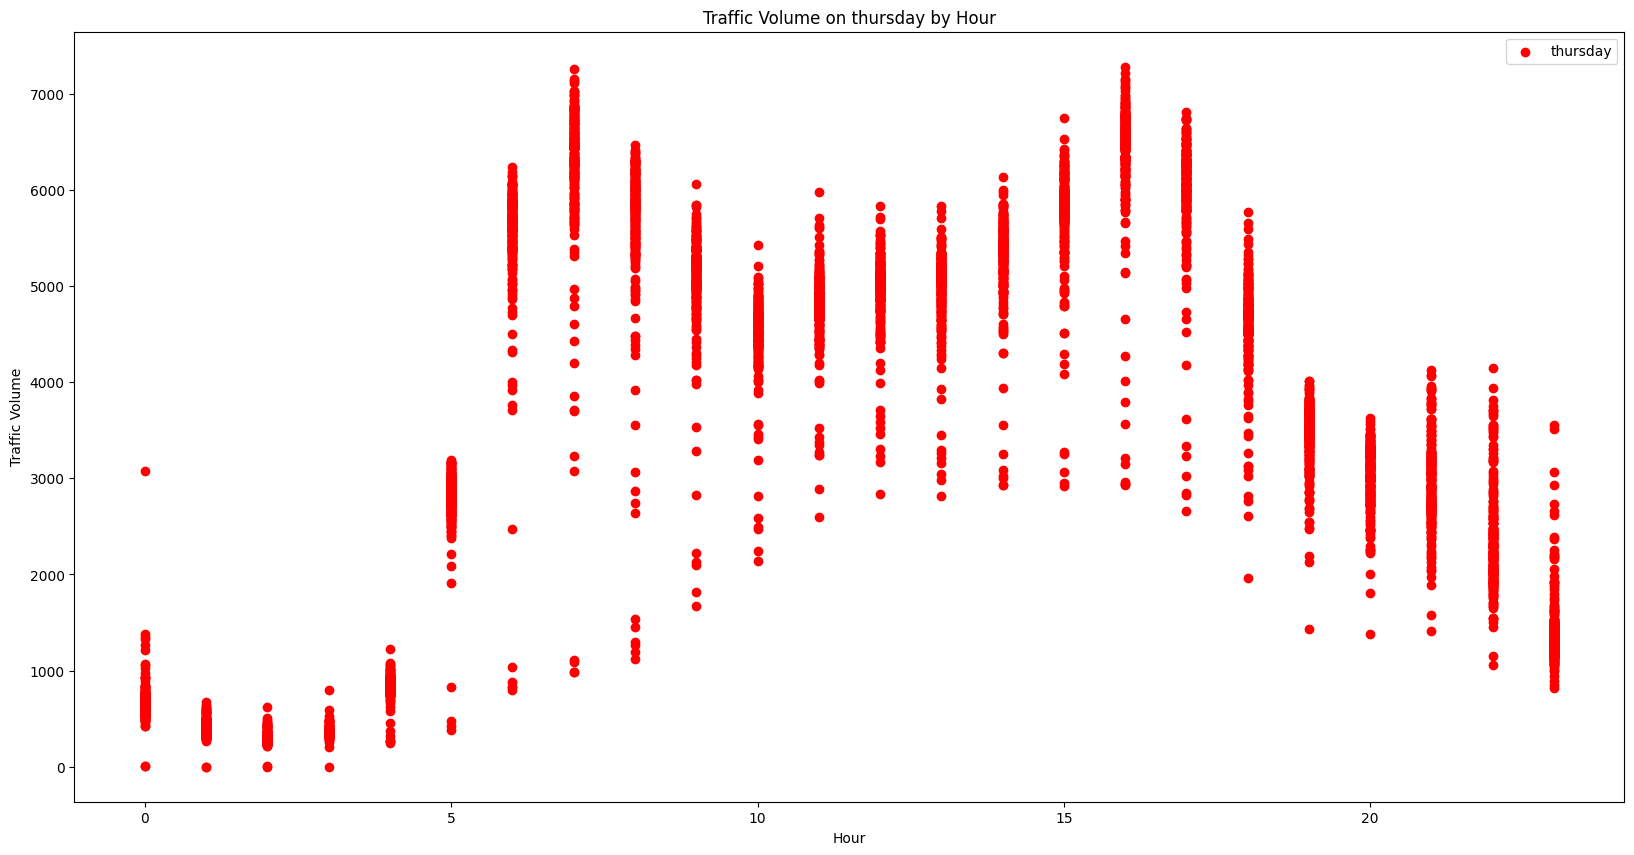

In [122]:
# Filter data for Monday
thursday_data = df_agg[df_agg['day_of_week'] == 3]

# Scatter plot for Monday
plt.scatter(thursday_data['hour'], thursday_data['traffic_volume'], color='r', label='thursday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume on thursday by Hour')
plt.show()


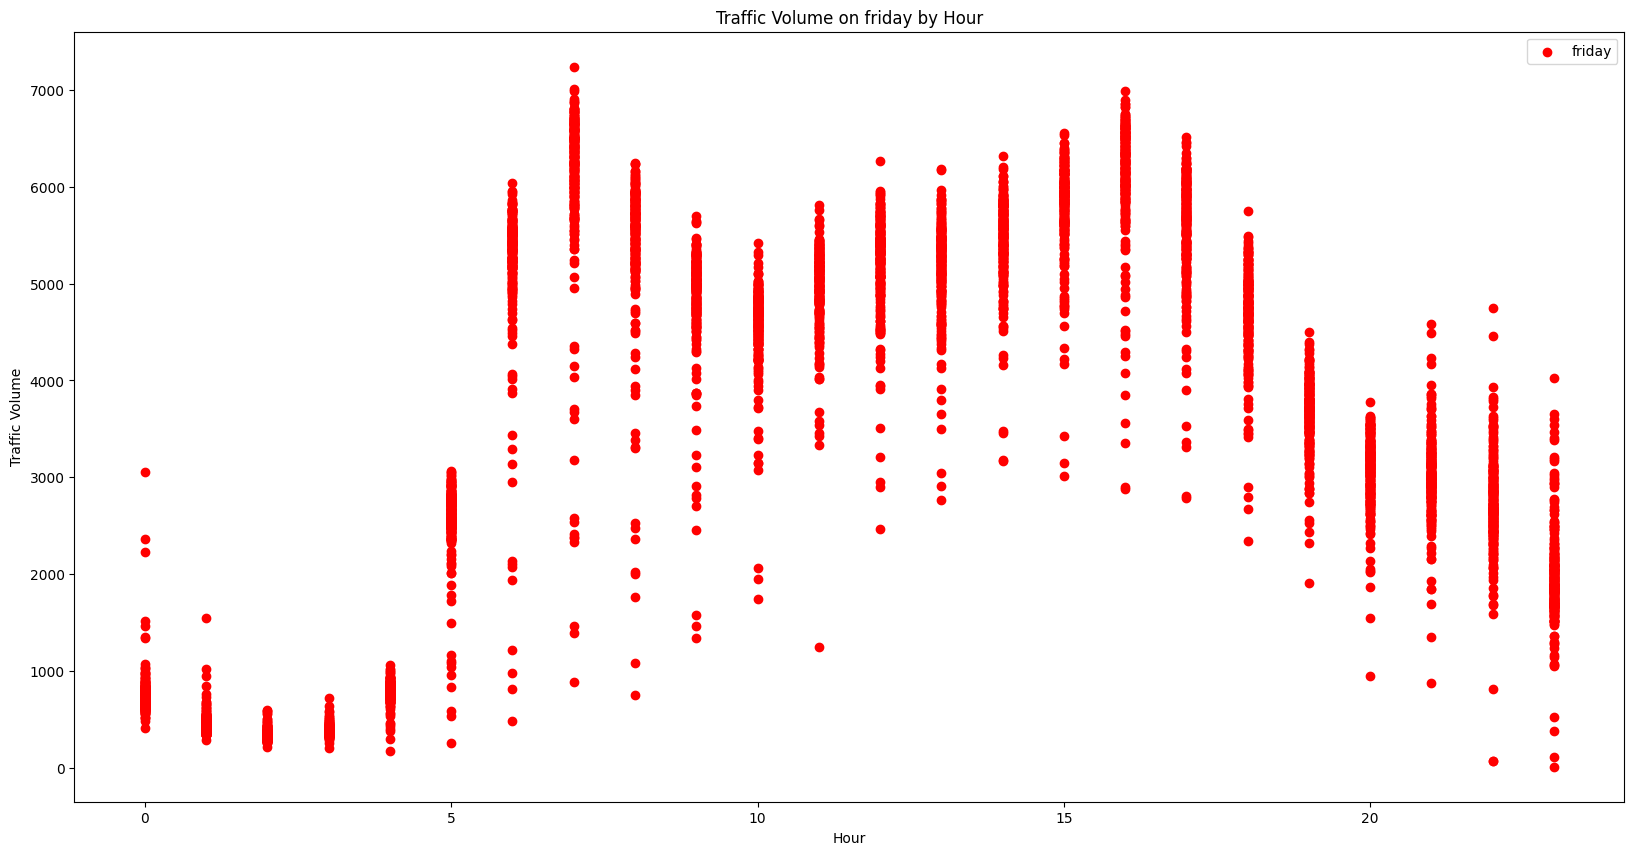

In [123]:
# Filter data for Monday
friday_data = df_agg[df_agg['day_of_week'] == 4]

# Scatter plot for Monday
plt.scatter(friday_data['hour'], friday_data['traffic_volume'], color='r', label='friday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume on friday by Hour')
plt.show()


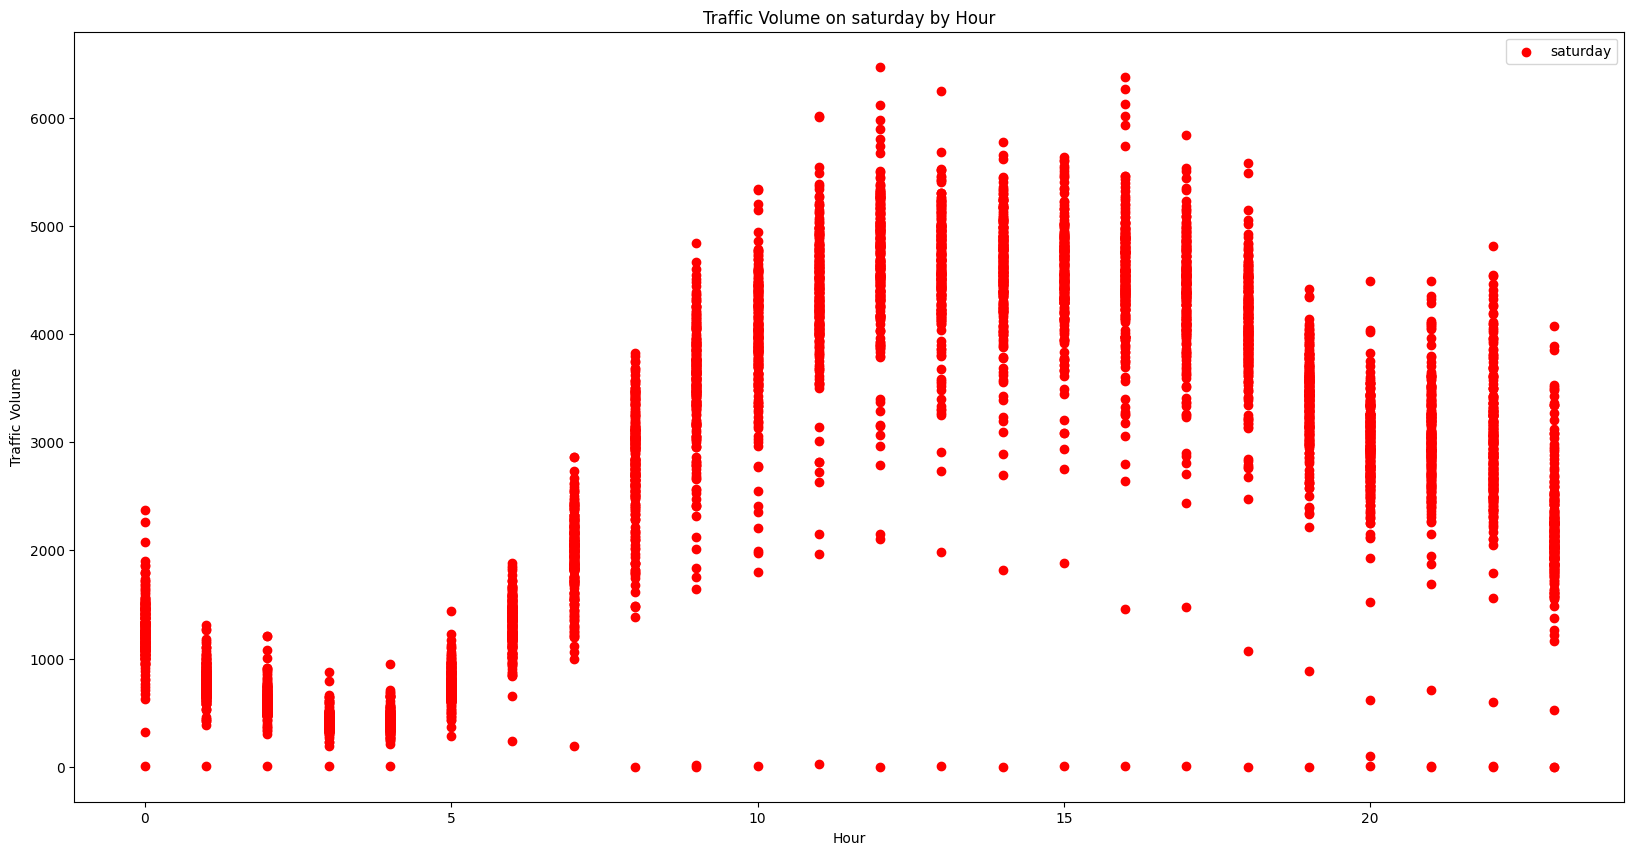

In [124]:
# Filter data for Monday
saturday_data = df_agg[df_agg['day_of_week'] == 5]

# Scatter plot for Monday
plt.scatter(saturday_data['hour'], saturday_data['traffic_volume'], color='r', label='saturday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume on saturday by Hour')
plt.show()


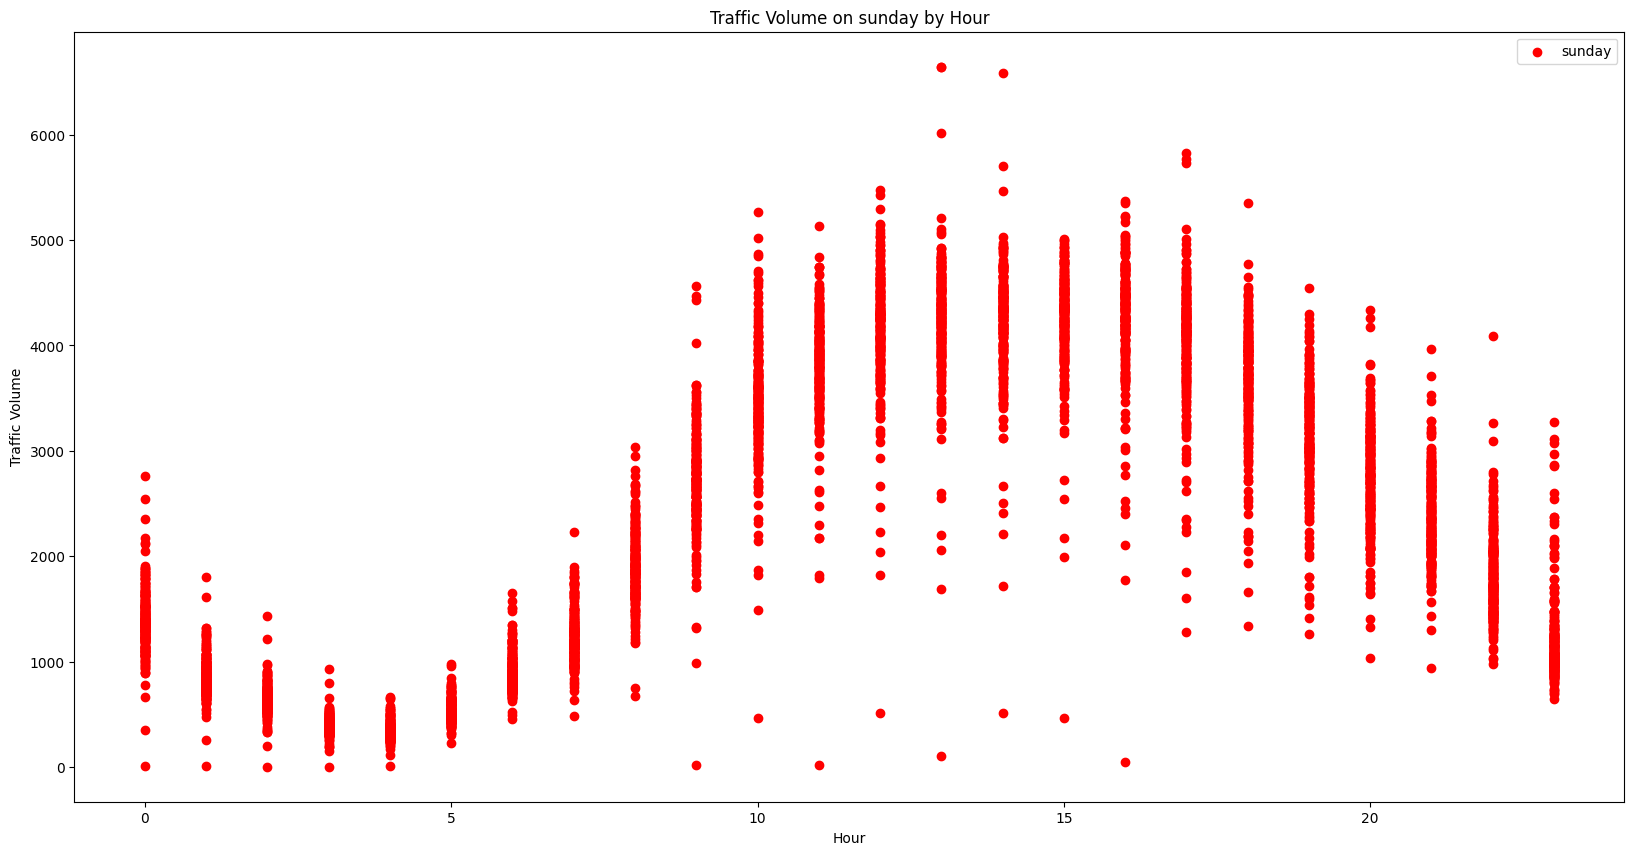

In [125]:
# Filter data for Monday
sunday_data = df_agg[df_agg['day_of_week'] == 6]

# Scatter plot for Monday
plt.scatter(sunday_data['hour'], sunday_data['traffic_volume'], color='r', label='sunday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume on sunday by Hour')
plt.show()


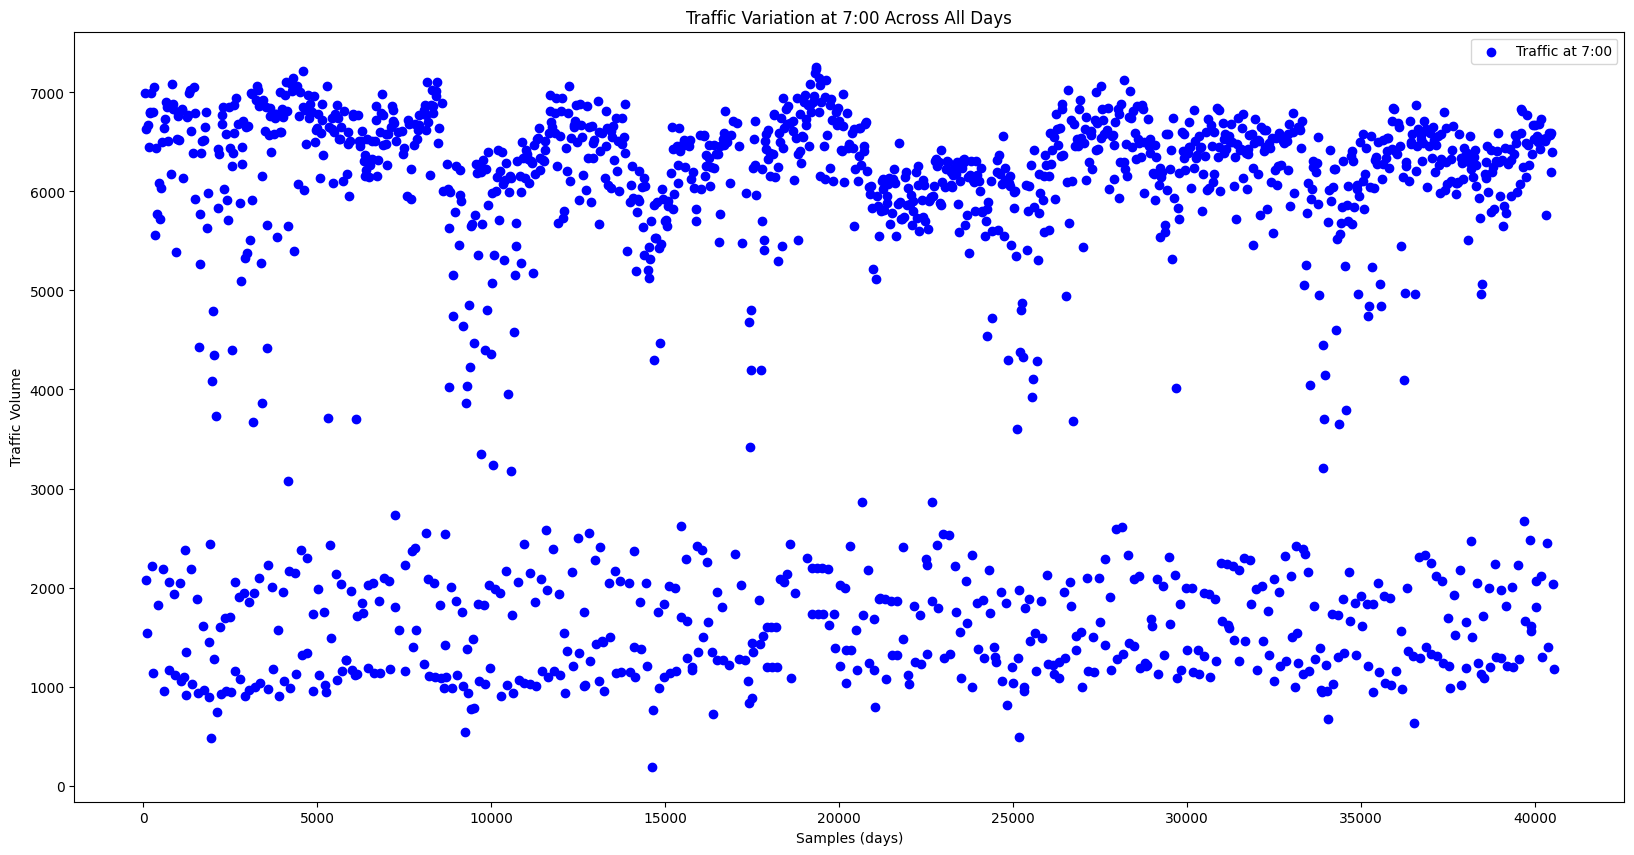

In [126]:

specific_hour = 7
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()


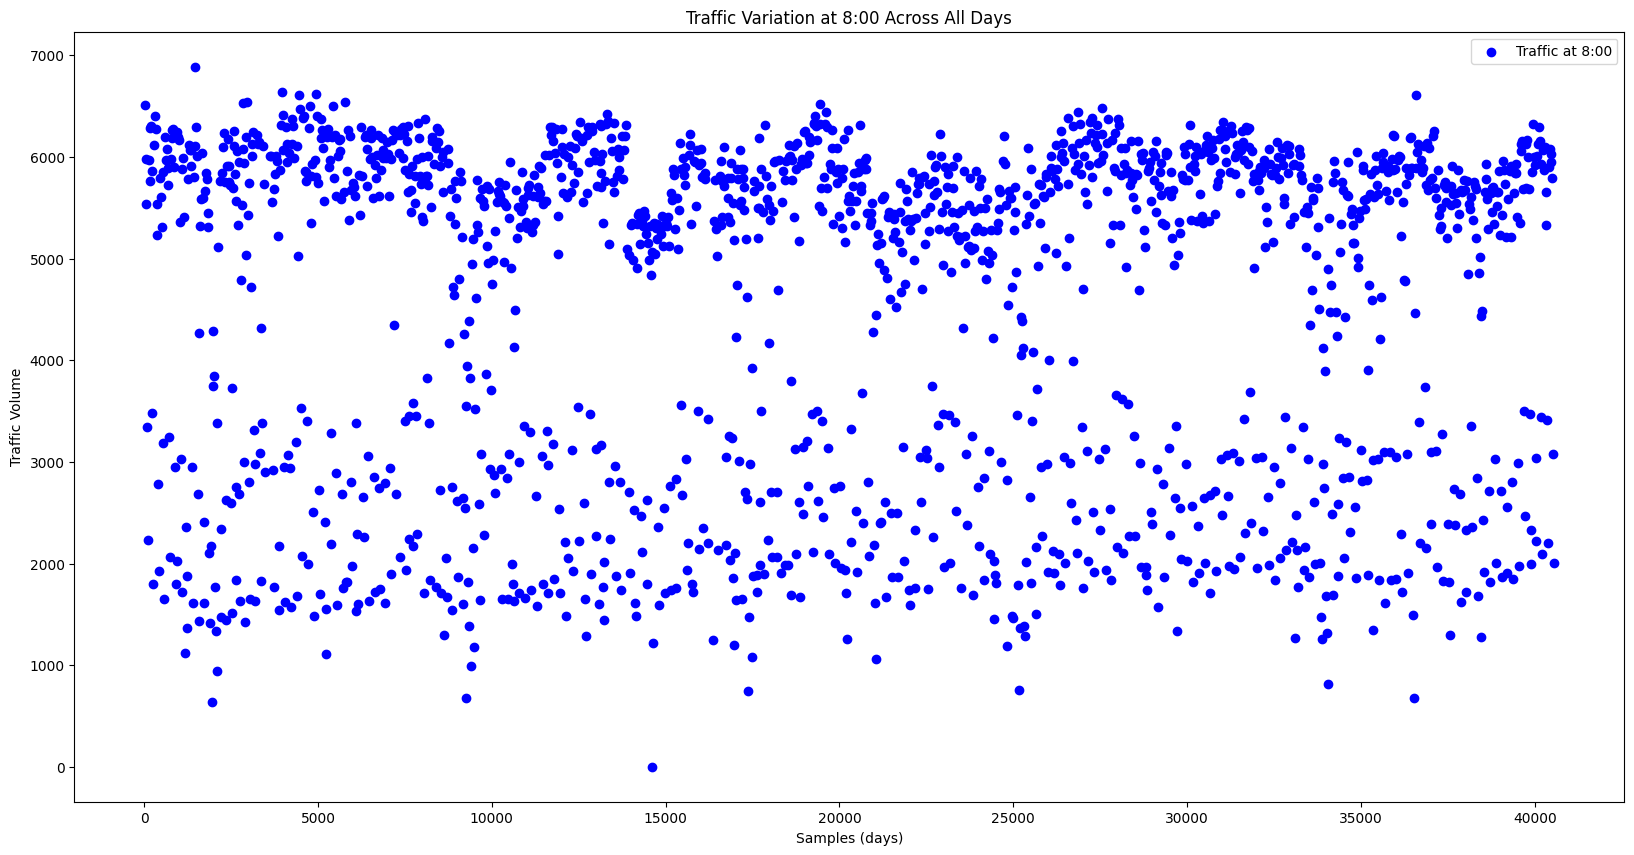

In [127]:
specific_hour = 8
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()








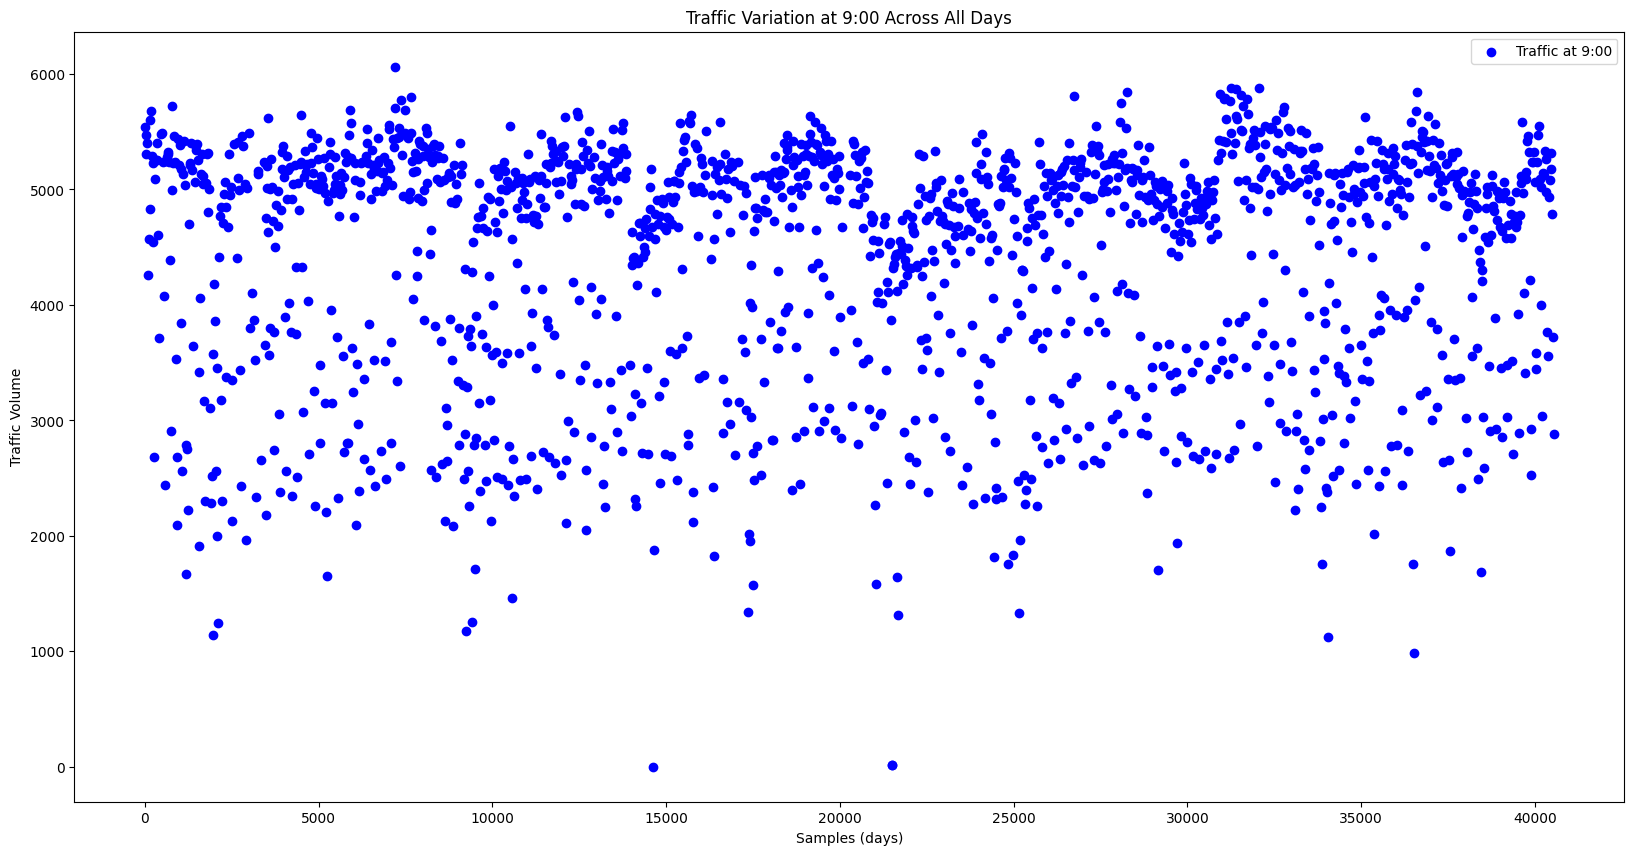

In [128]:
specific_hour = 9
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

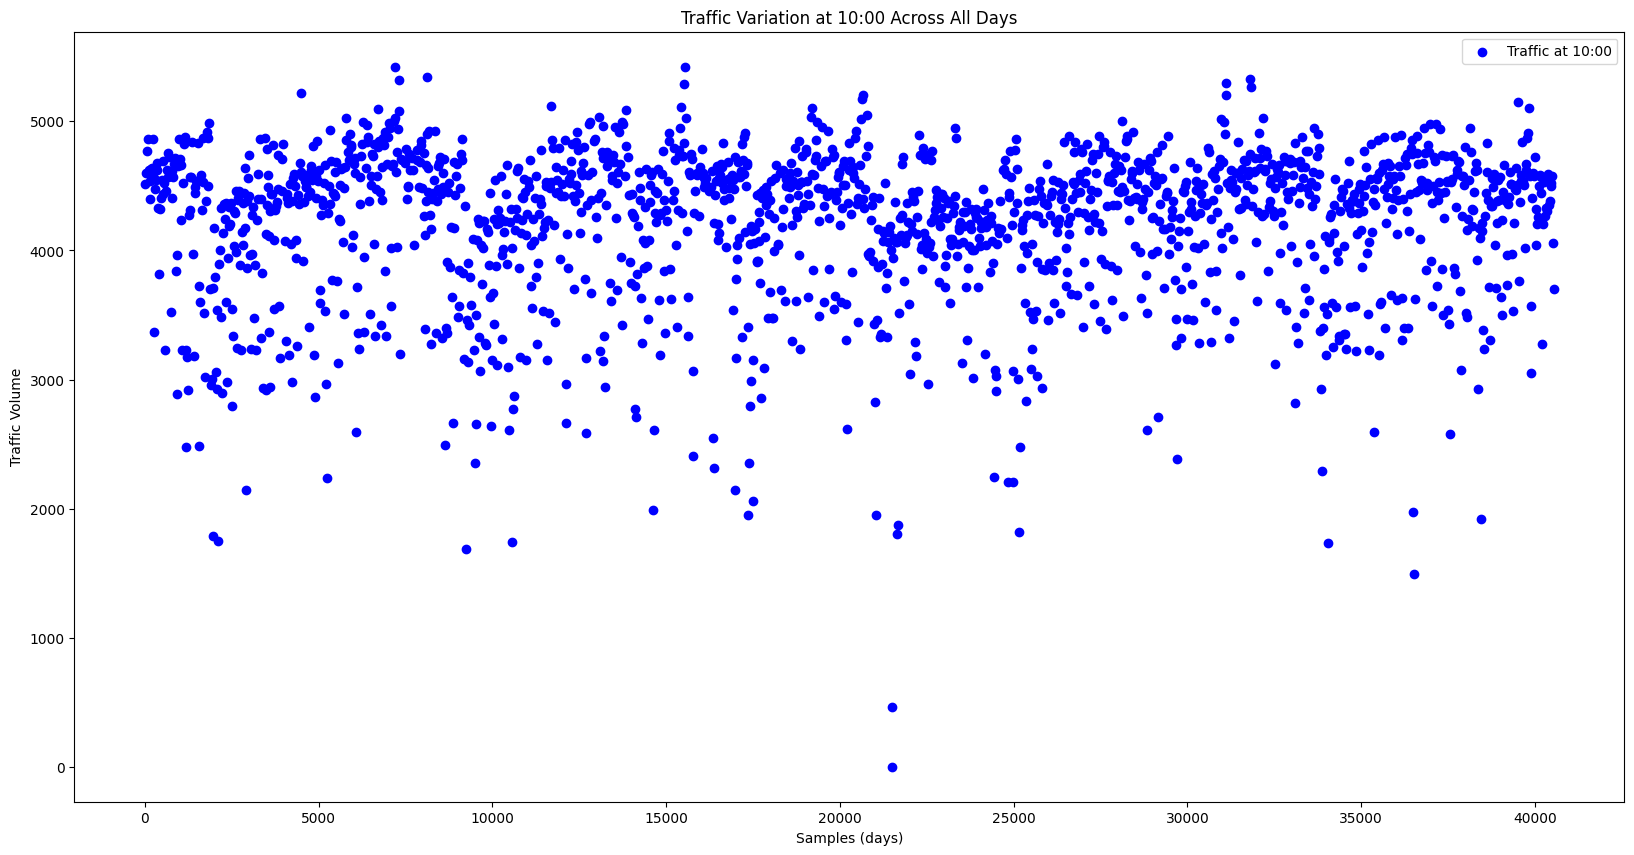

In [129]:
specific_hour =10
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

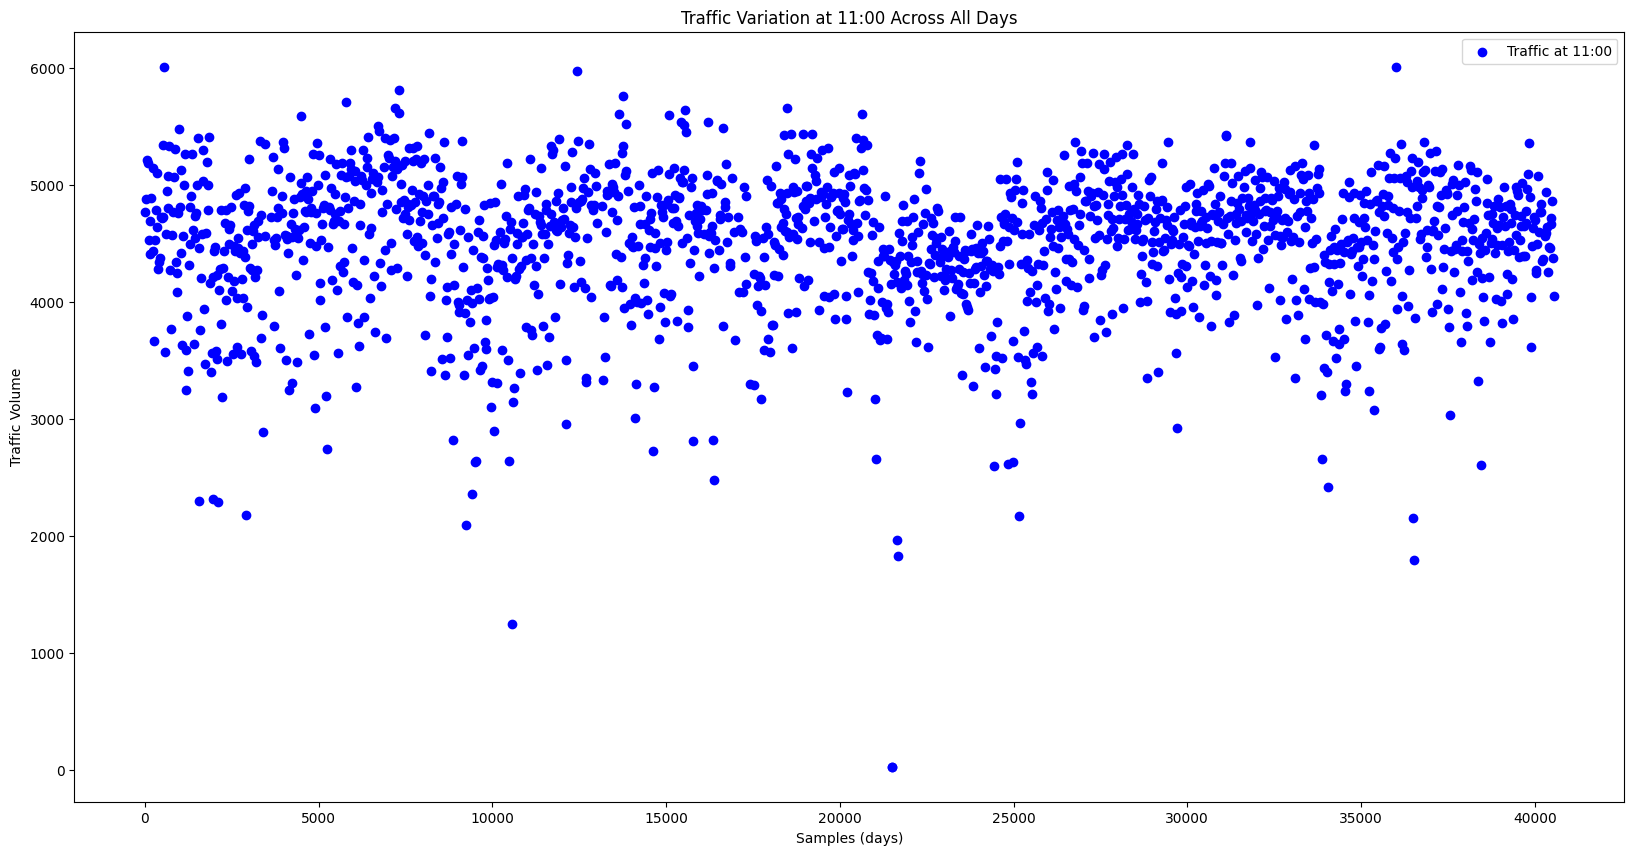

In [130]:
specific_hour =11
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

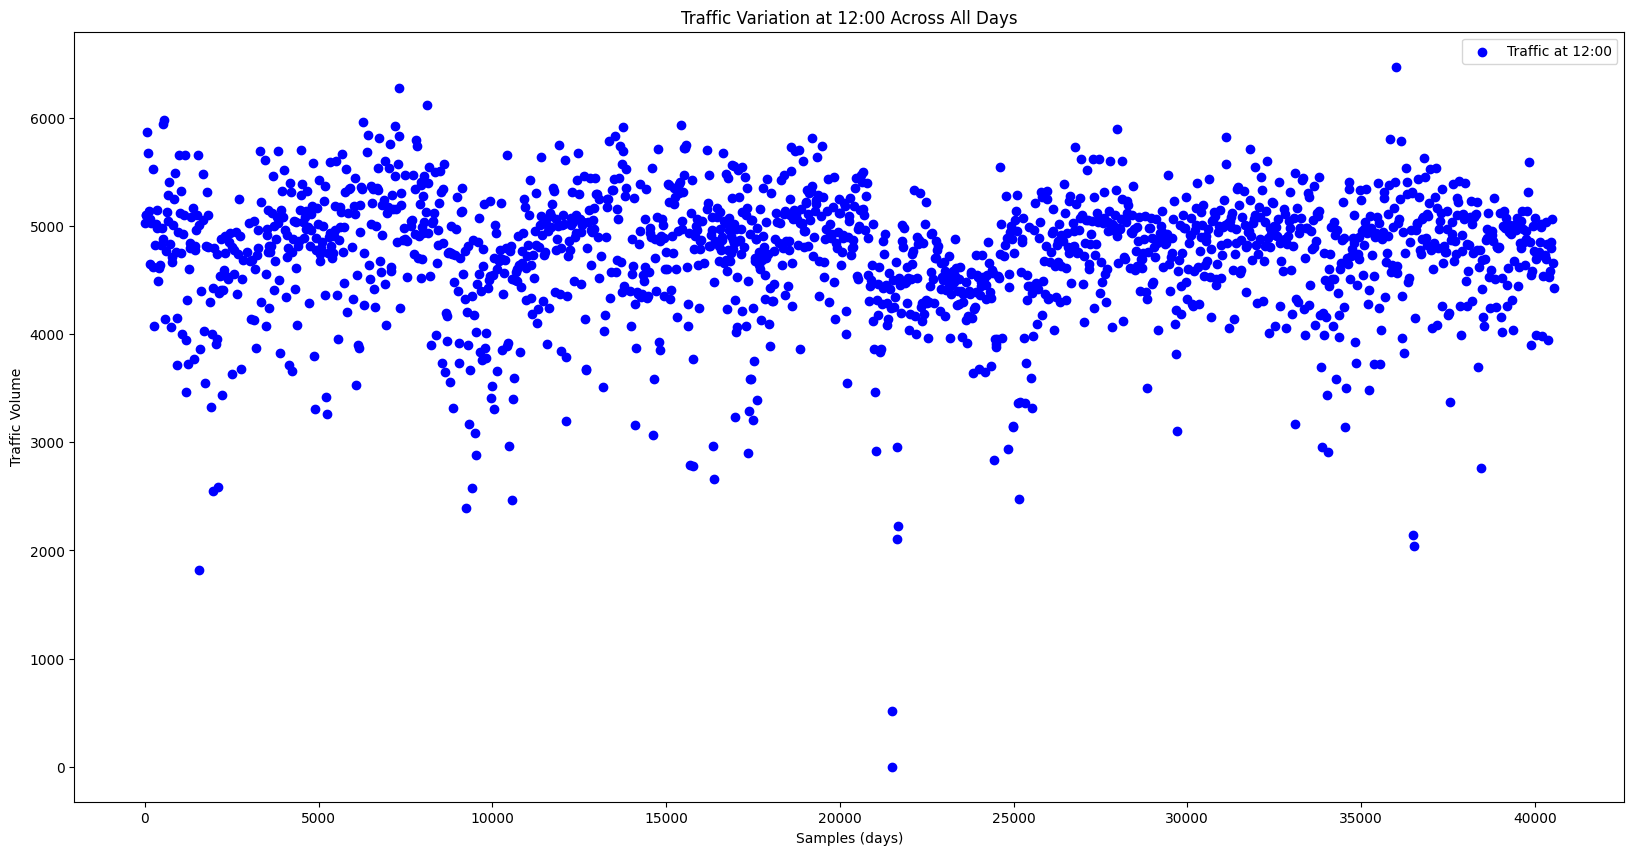

In [131]:
specific_hour = 12
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

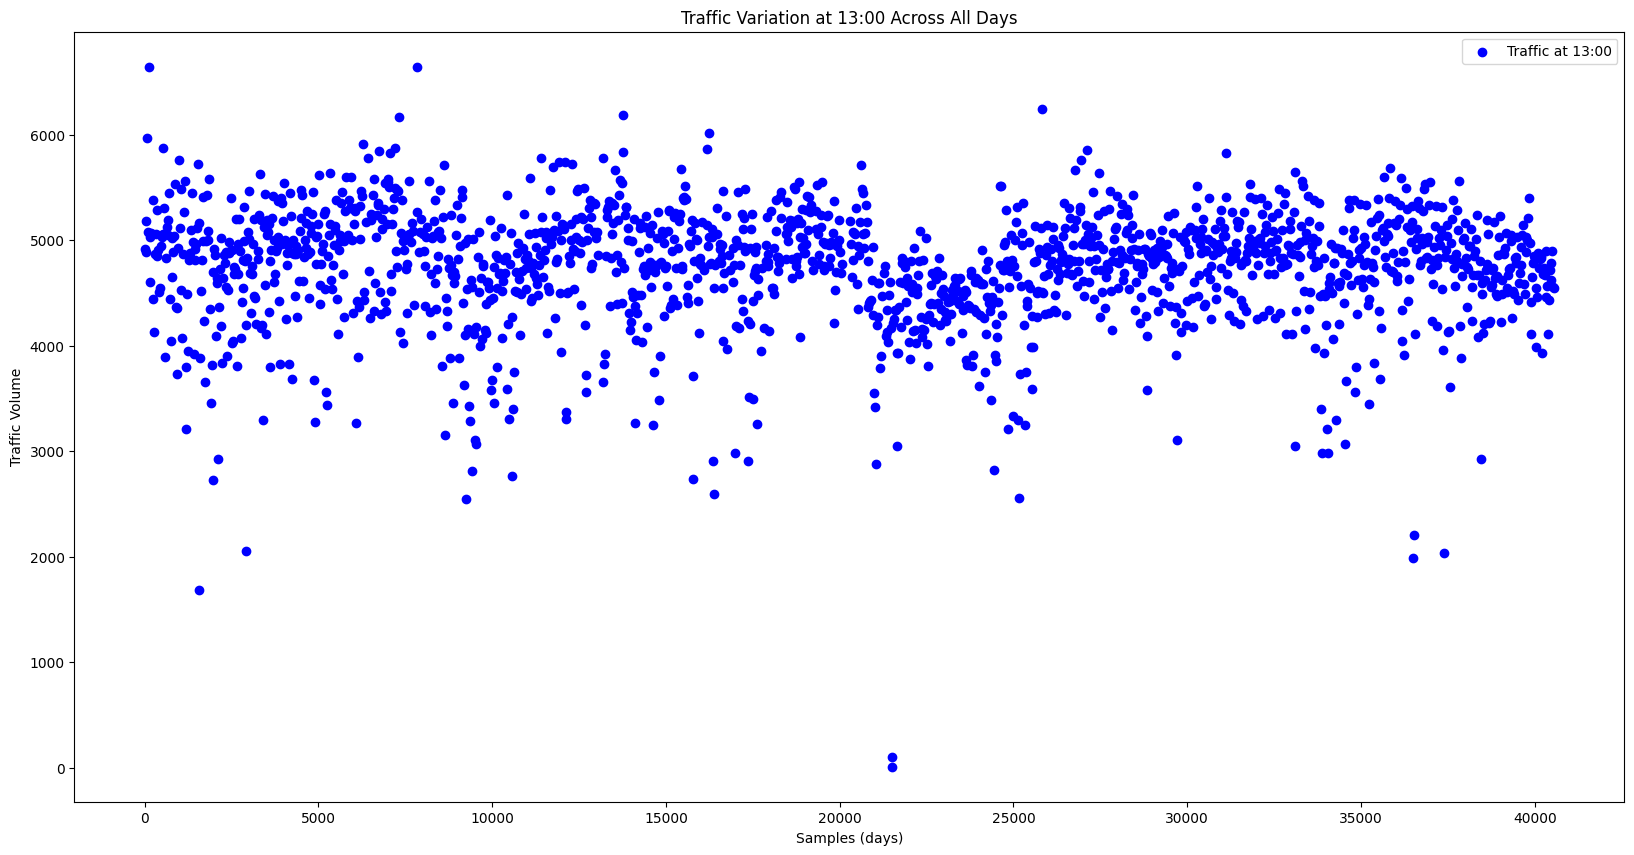

In [132]:
specific_hour =13
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

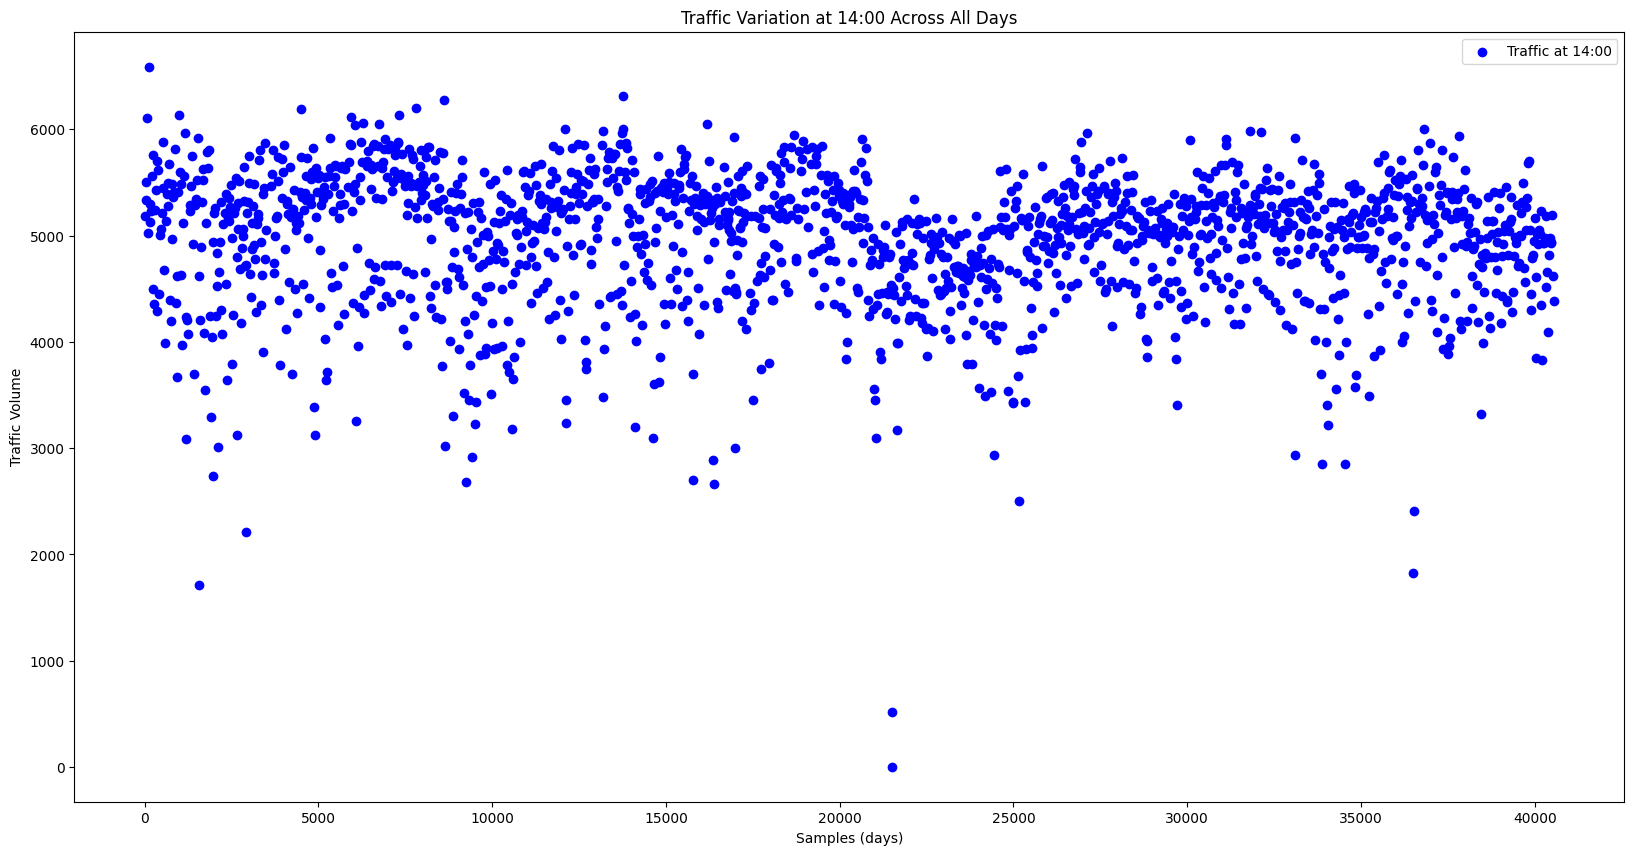

In [133]:
specific_hour = 14
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

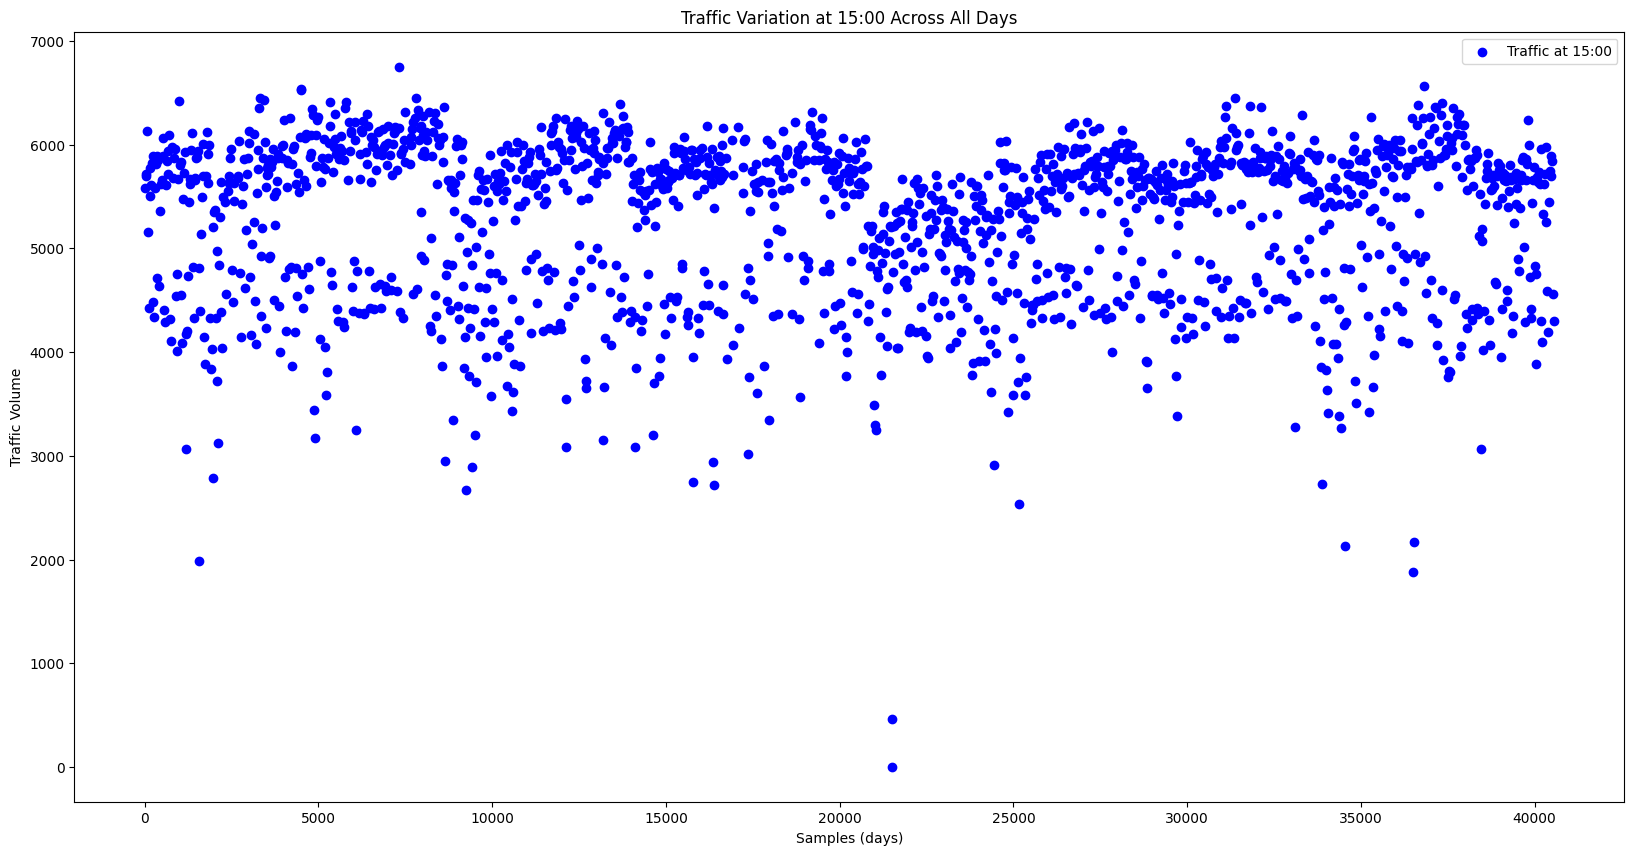

In [134]:
specific_hour = 15
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

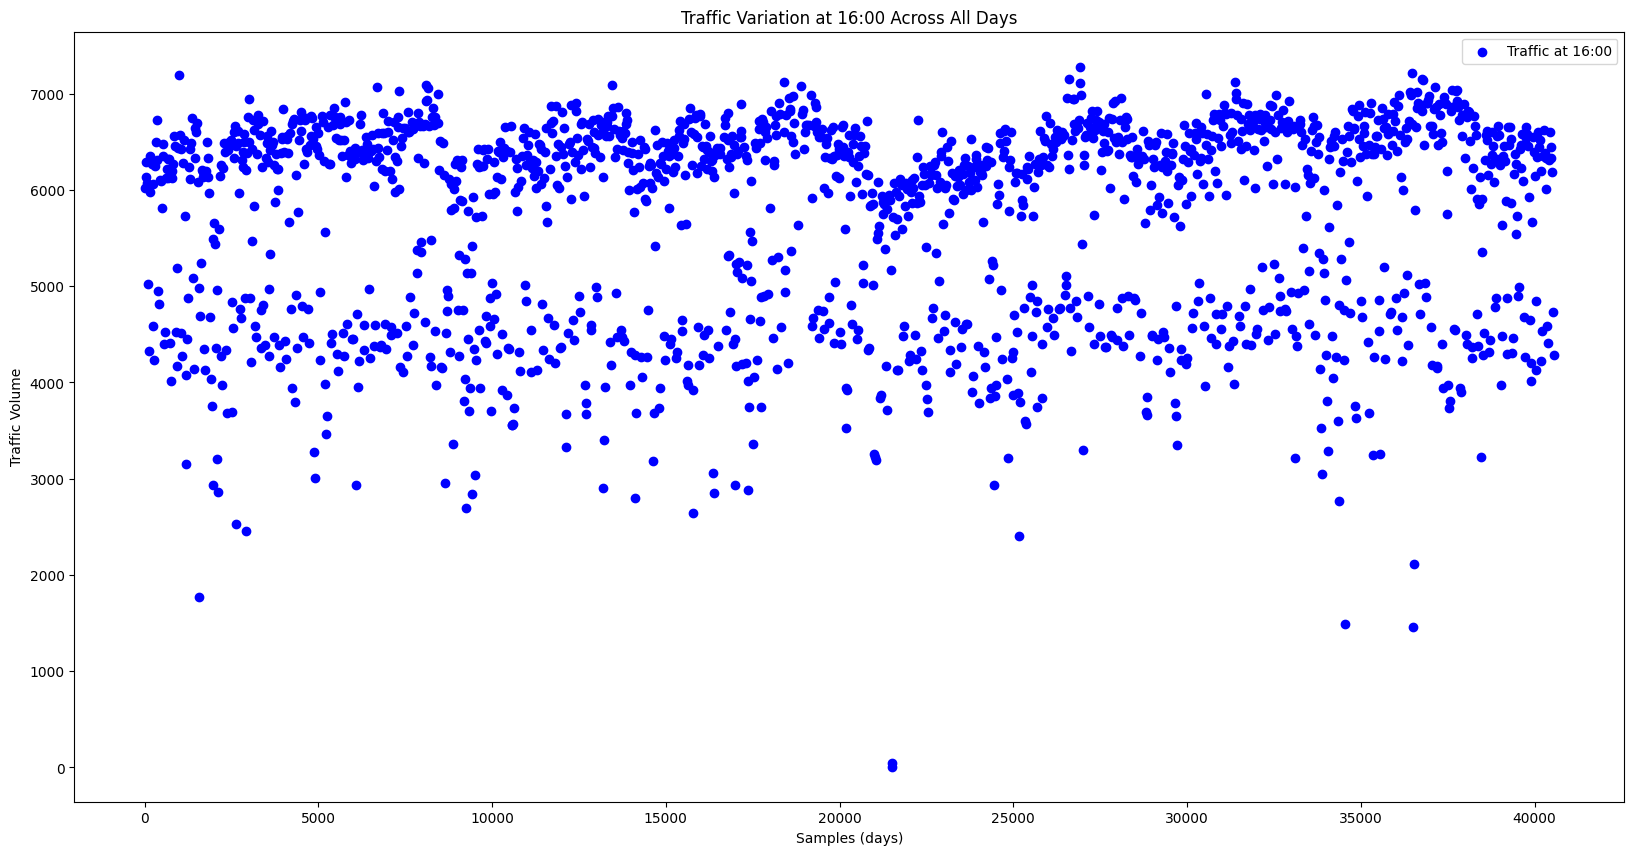

In [135]:
specific_hour = 16
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

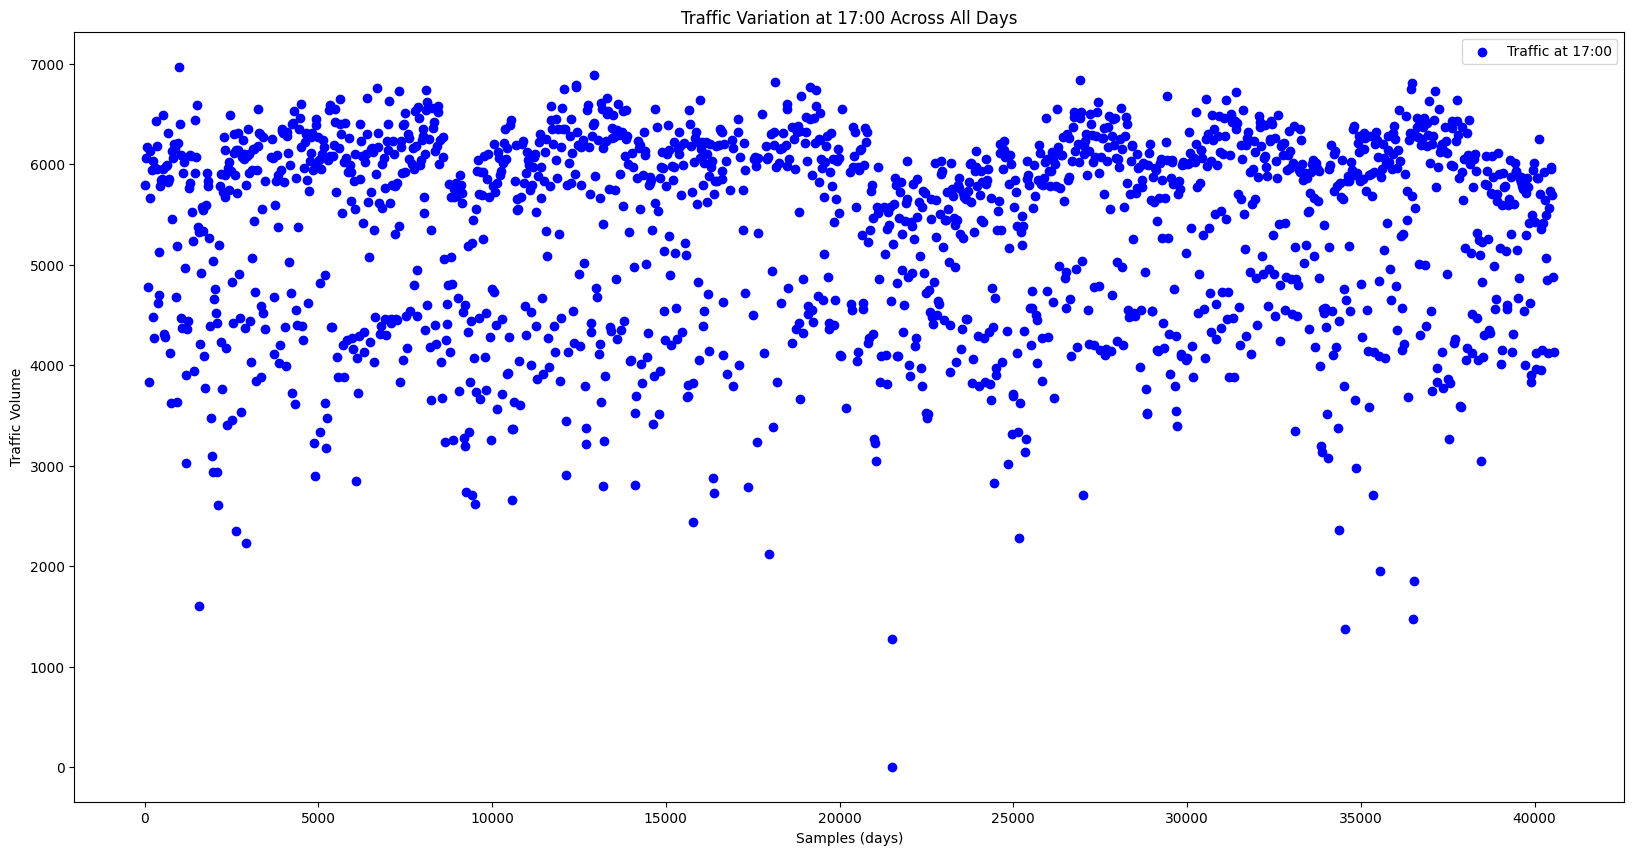

In [136]:
specific_hour = 17
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

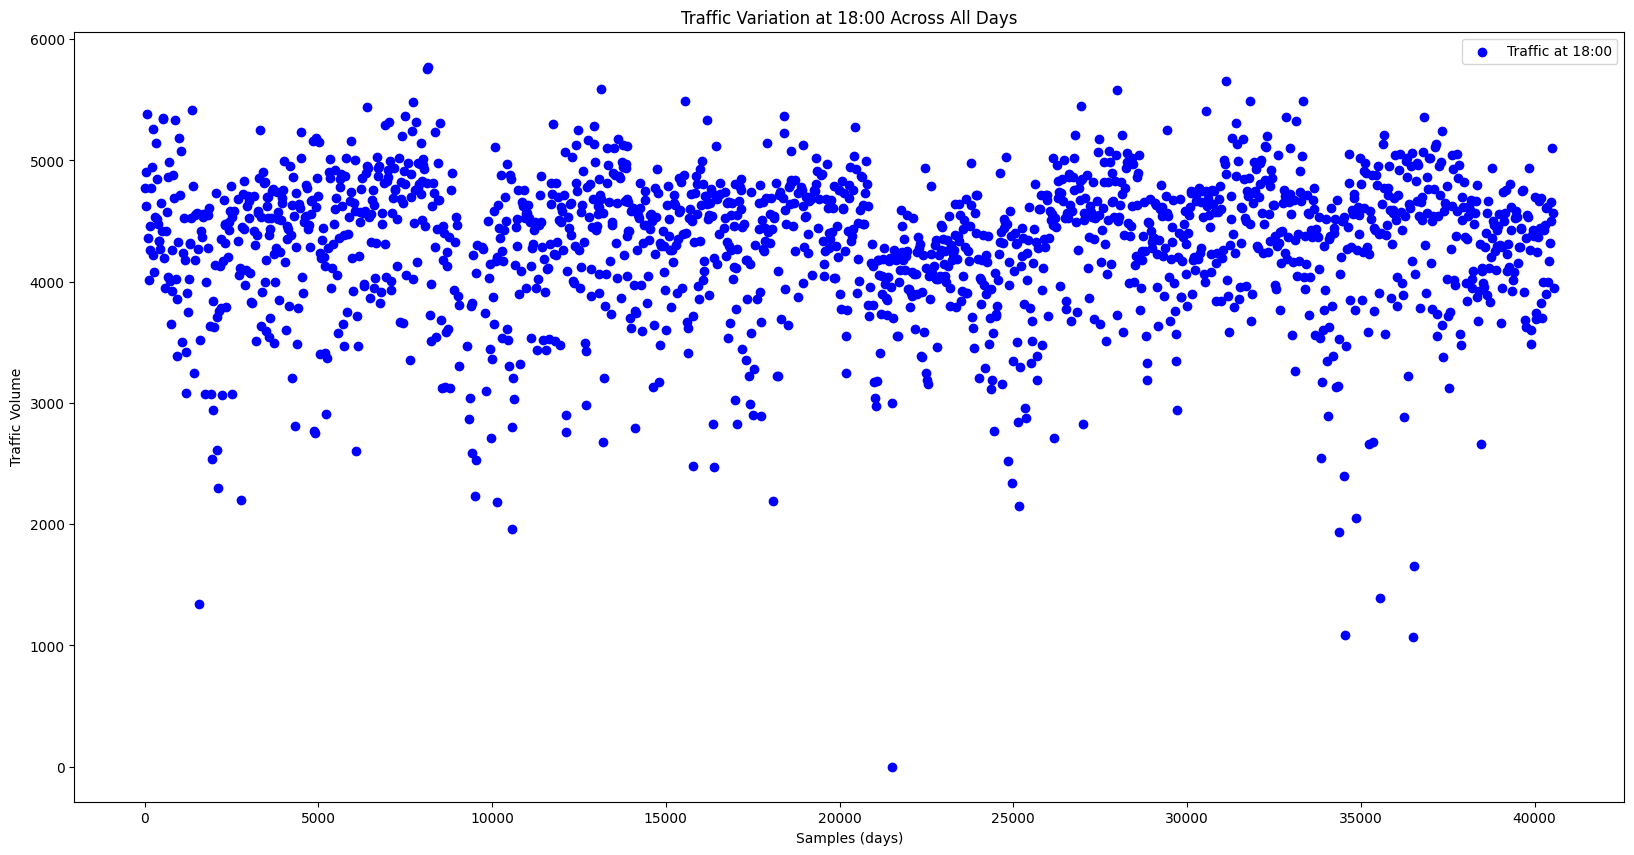

In [137]:
specific_hour = 18
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

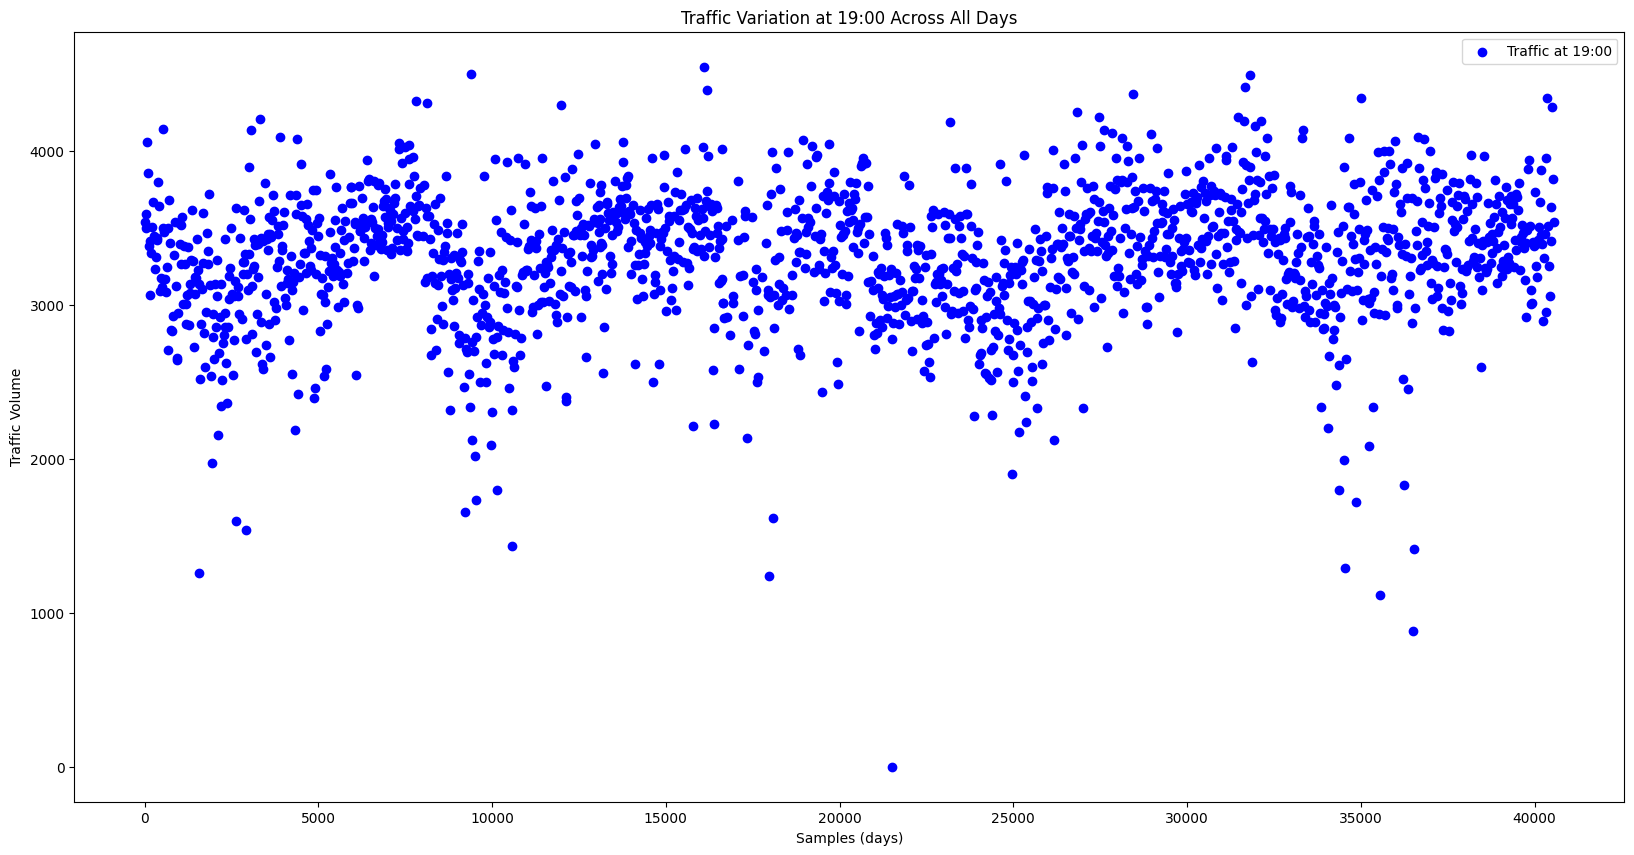

In [138]:
specific_hour = 19
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

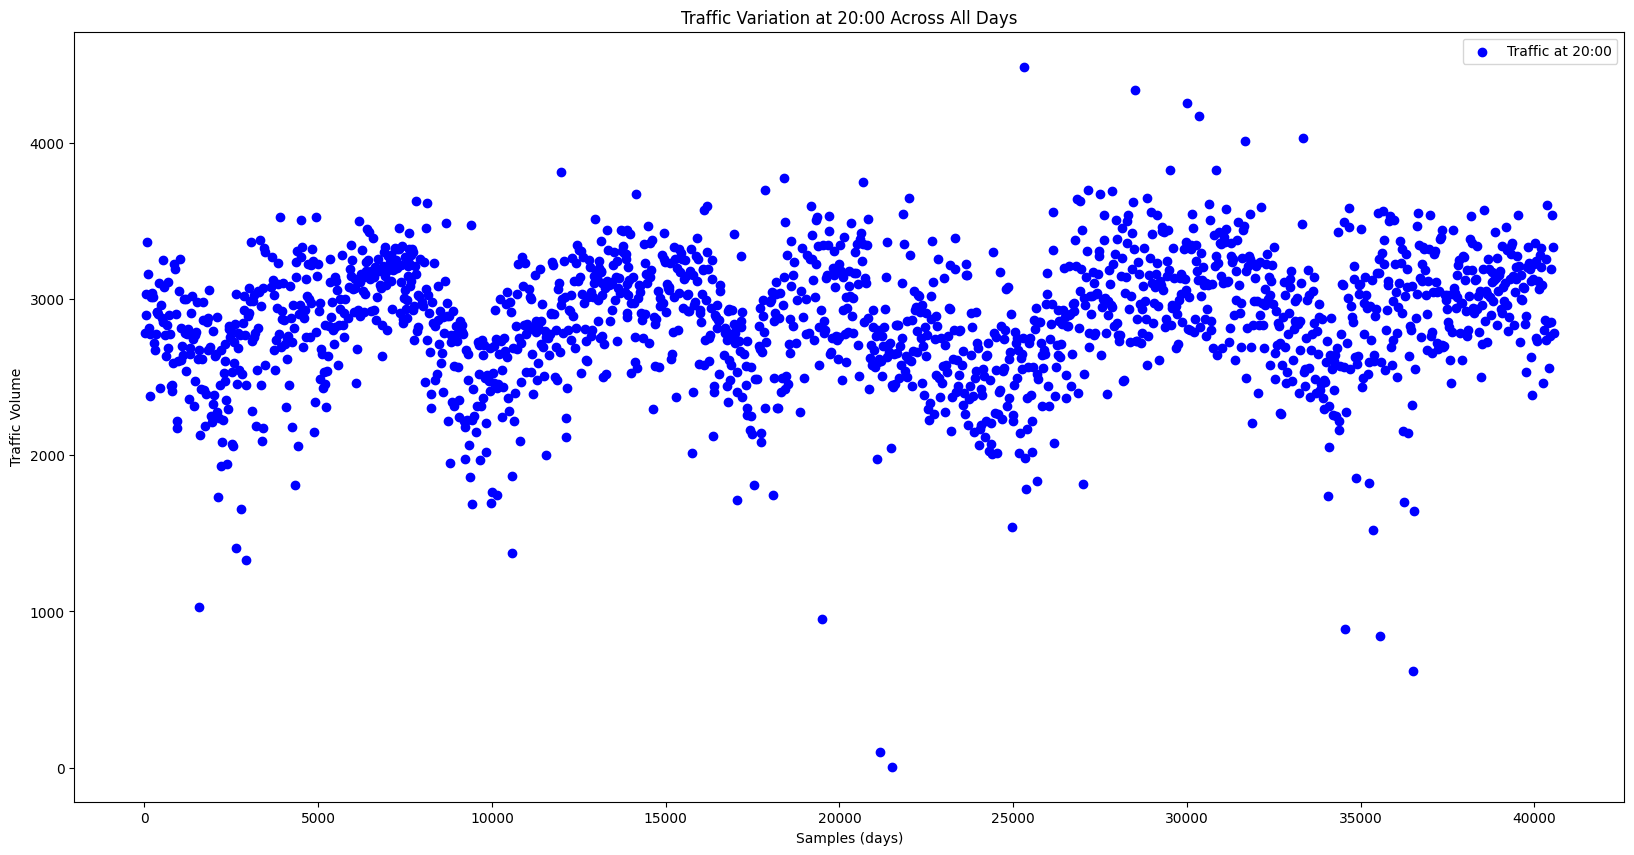

In [139]:
specific_hour = 20
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

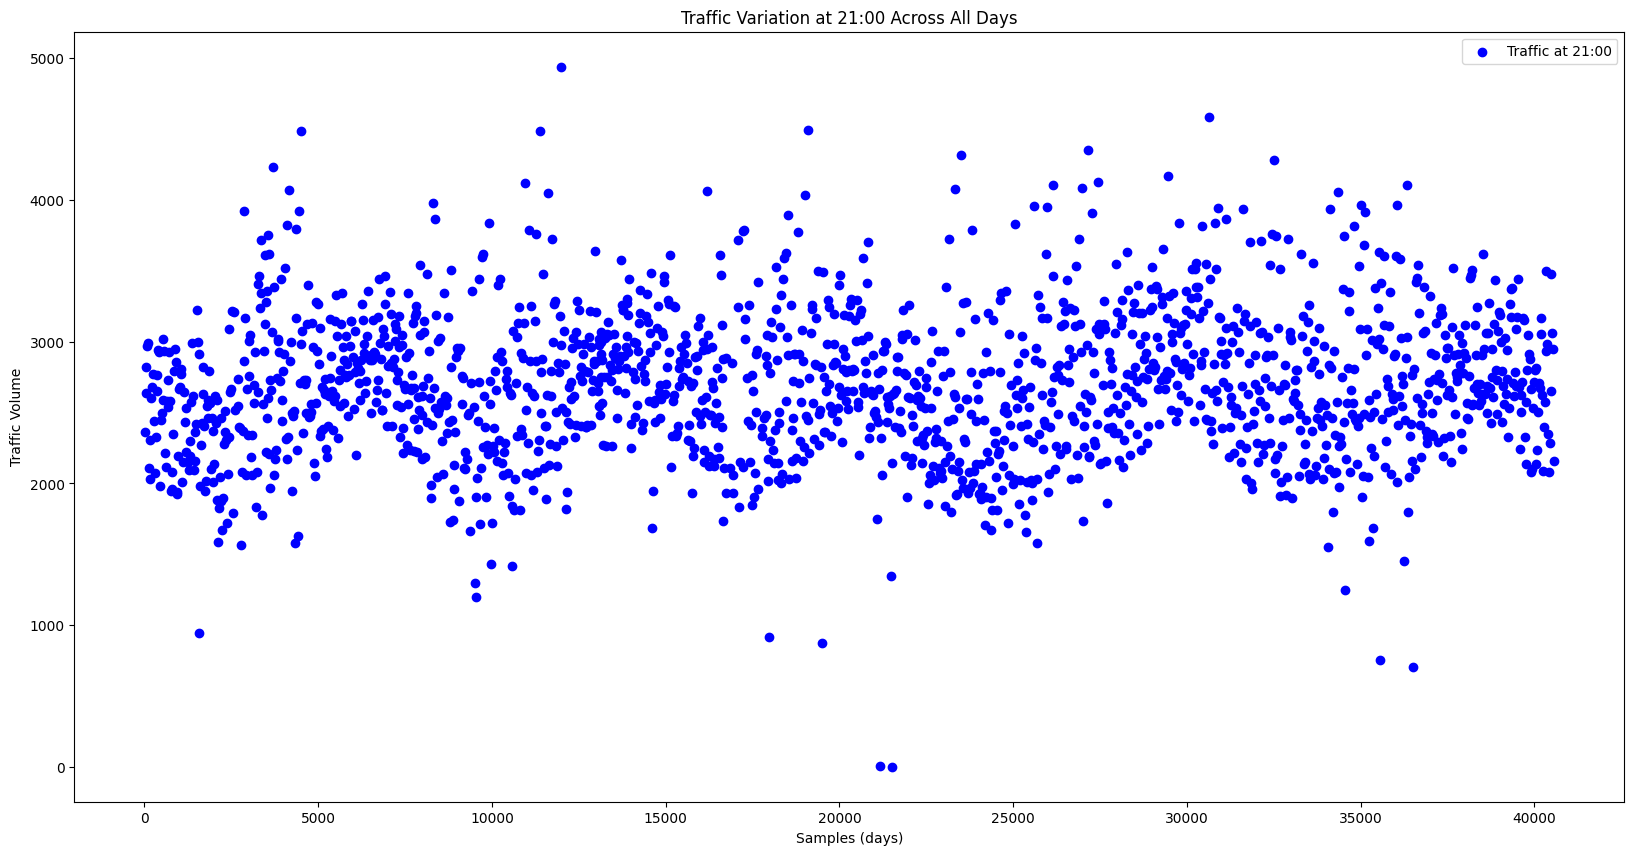

In [140]:
specific_hour = 21
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

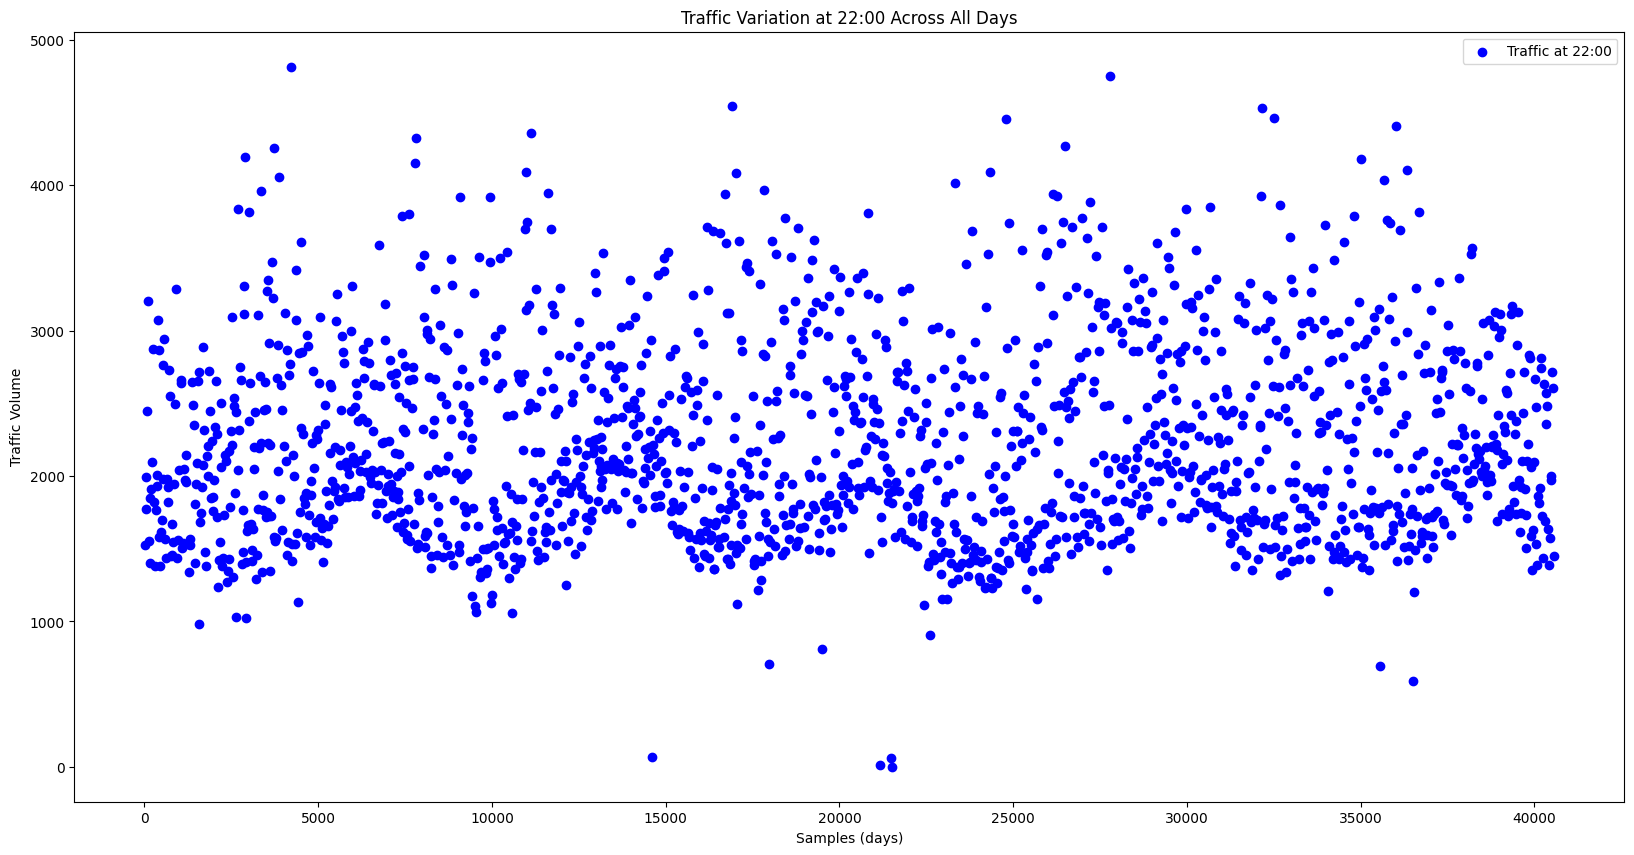

In [141]:
specific_hour = 22
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

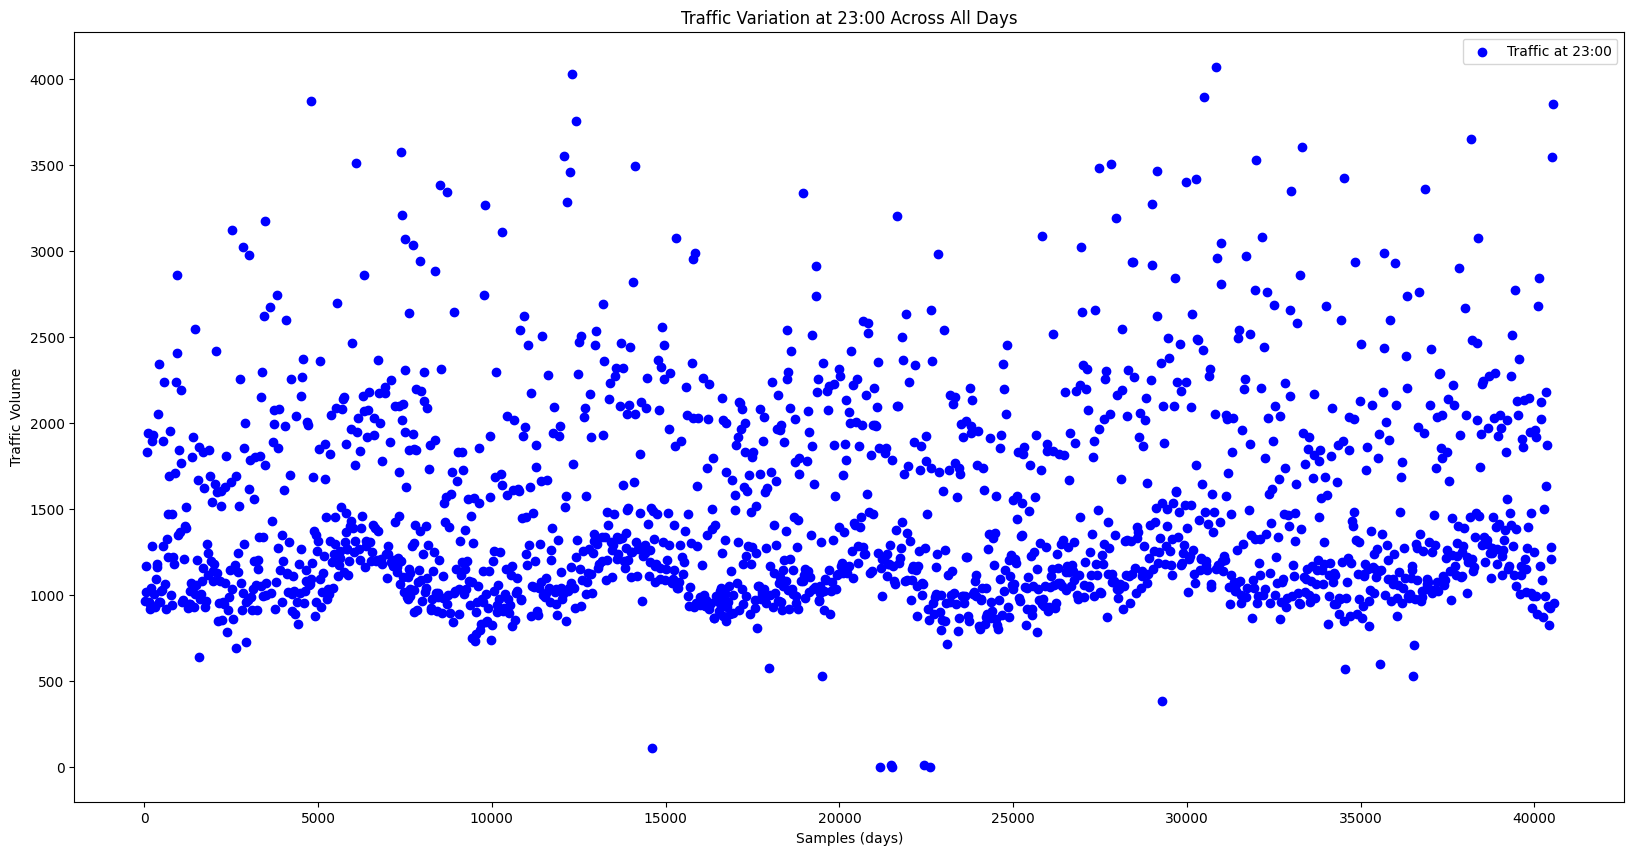

In [142]:
specific_hour = 23
hourly_data = df_agg[df_agg['hour'] == specific_hour]

# Scatter plot showing traffic variation at the specific hour across all days
plt.scatter(hourly_data.index, hourly_data['traffic_volume'], label=f'Traffic at {specific_hour}:00', color='b')
plt.legend(loc='best')
plt.xlabel('Samples (days)')
plt.ylabel('Traffic Volume')
plt.title(f'Traffic Variation at {specific_hour}:00 Across All Days')
plt.show()

In [143]:
# is_day_off column creation
df_agg['is_day_off'] = np.where(np.logical_or(df_agg.day_of_week==5, df_agg.day_of_week==6), 1, 0)
df_agg['is_day_off'] = np.where(df_agg.holiday_bool==1, 1, df_agg['is_day_off'])

In [144]:
df_agg.head()

date_time holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke  hour  day_of_week  month  is_day_off
0 2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False     9            1     10           0
1 2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75       Clouds       broken clouds            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False    10            1     10           0
2 2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False    11            1     10           0
3 2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False    12            1     10           0
4 2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75       Clouds       broken clouds            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False    13            1     10           0

In [145]:
print(df_agg['is_day_off'].value_counts())


is_day_off
0    28921
1    11643
Name: count, dtype: int64


In [146]:
print(df_agg['day_of_week'].value_counts())
print(df_agg['holiday_bool'].value_counts())


day_of_week
4    5873
6    5806
2    5803
0    5798
3    5797
5    5784
1    5703
Name: count, dtype: int64
holiday_bool
0    40511
1       53
Name: count, dtype: int64


Text(0, 0.5, 'traffic volume')

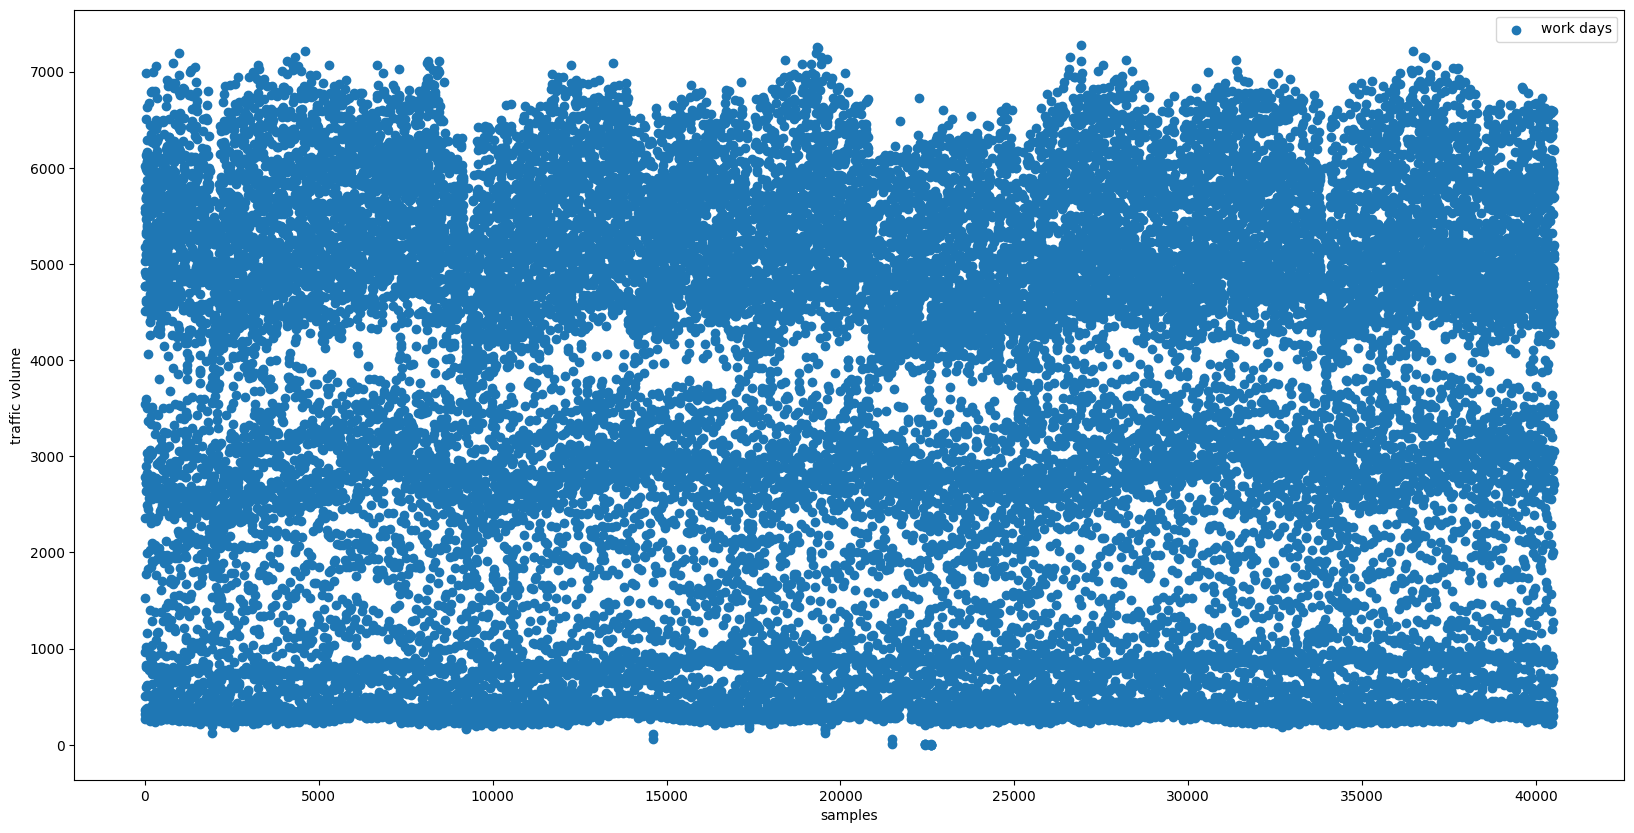

In [147]:
plt.scatter(df_agg[df_agg.is_day_off==0].index, df_agg[df_agg.is_day_off==0].traffic_volume, label='work days')
plt.legend(loc='best')
plt.xlabel('samples')
plt.ylabel('traffic volume')

Text(0, 0.5, 'traffic volume')

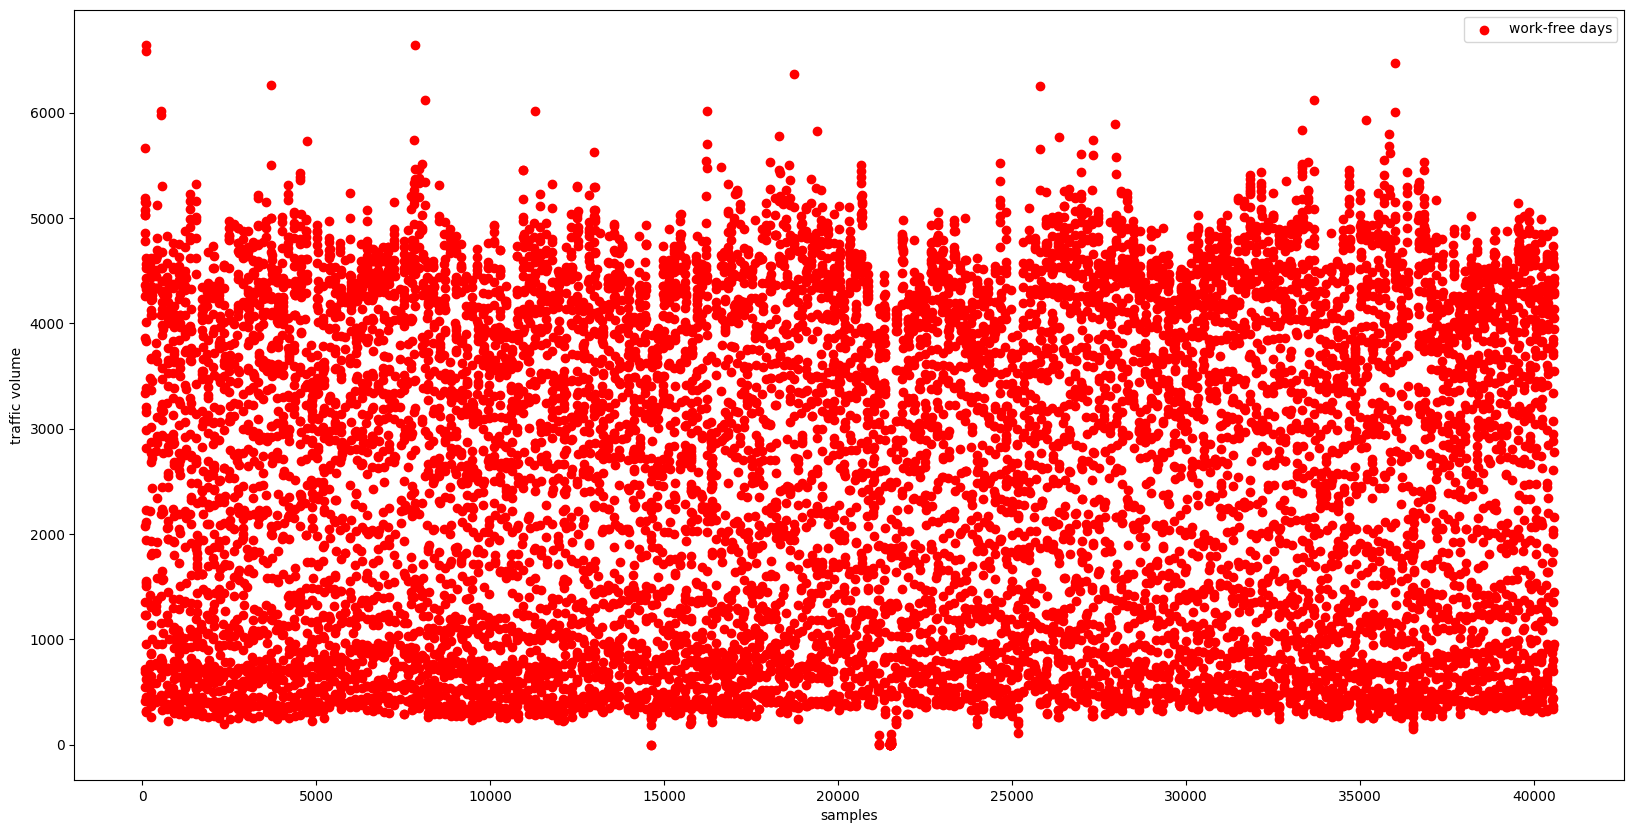

In [148]:
plt.scatter(df_agg[df_agg.is_day_off==1].index, df_agg[df_agg.is_day_off==1].traffic_volume, color='r', label='work-free days')
plt.legend(loc='best')
plt.xlabel('samples')
plt.ylabel('traffic volume')

In [149]:
df_agg.head()

date_time holiday    temp  rain_1h  snow_1h  clouds_all weather_main weather_description  traffic_volume  holiday_bool  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke  hour  day_of_week  month  is_day_off
0 2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40       Clouds    scattered clouds            5545             0   15.13                 True               False              False                 False              False              False             False                      False              False                False               False     9            1     10           0
1 2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75       Clouds       broken clouds            4516             0   16.21                 True               False              False                 False              False              False             False                      False              False                False               False    10            1     10           0
2 2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90       Clouds     overcast clouds            4767             0   16.43                 True               False              False                 False              False              False             False                      False              False                False               False    11            1     10           0
3 2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90       Clouds     overcast clouds            5026             0   16.98                 True               False              False                 False              False              False             False                      False              False                False               False    12            1     10           0
4 2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75       Clouds       broken clouds            4918             0   17.99                 True               False              False                 False              False              False             False                      False              False                False               False    13            1     10           0

<Axes: >

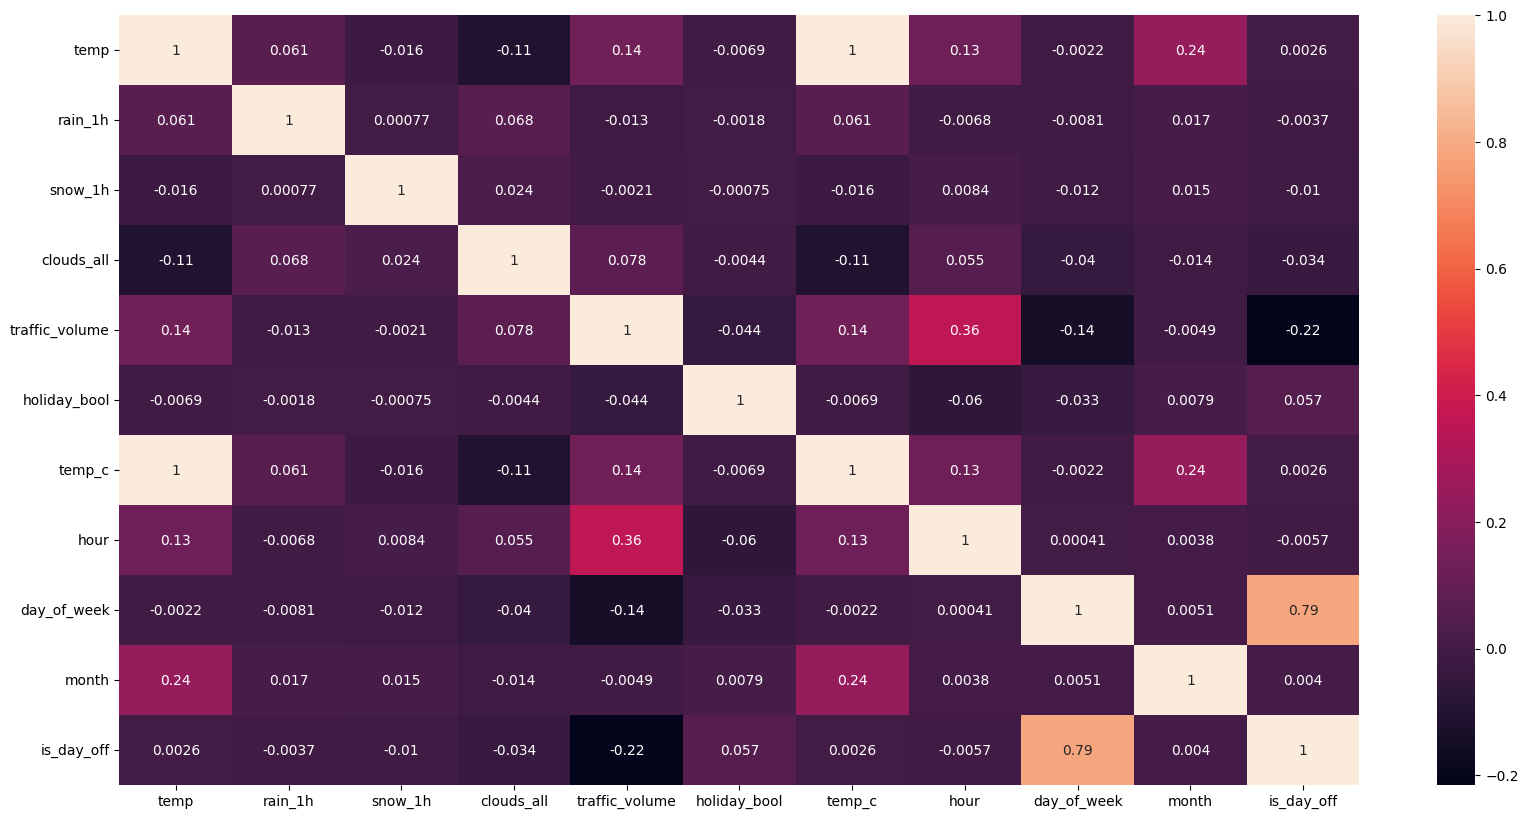

In [150]:
# Filter out non-numeric columns
df_numeric = df_agg.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.rcParams['figure.figsize'] = [20, 10]
sn.heatmap(corr_matrix, annot=True)


In [151]:
df_agg.shape[1]

26

In [152]:
# save preprocessed data to csv
preprocessed_data = df_agg[['rain_1h', 'snow_1h', 'clouds_all', 'temp_c', 'weather_main_Clouds', 'weather_main_Clear', 'weather_main_Rain', 'weather_main_Drizzle',
                            'weather_main_Mist', 'weather_main_Haze', 'weather_main_Fog', 'weather_main_Thunderstorm', 'weather_main_Snow', 'weather_main_Squall', 'weather_main_Smoke', 'hour', 'is_day_off',
                            'day_of_week', 'holiday_bool', 'month', 'date_time', 'traffic_volume']]
preprocessed_data.to_csv("preprocessed_data2.csv", index=False)

In [153]:
corr_matrix['traffic_volume']

temp              0.139241
rain_1h          -0.013425
snow_1h          -0.002091
clouds_all        0.078210
traffic_volume    1.000000
holiday_bool     -0.044235
temp_c            0.139241
hour              0.355087
day_of_week      -0.144165
month            -0.004865
is_day_off       -0.215541
Name: traffic_volume, dtype: float64

In [154]:
cf = pd.read_csv('preprocessed_data2.csv')
cf.head()

rain_1h  snow_1h  clouds_all  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke  hour  is_day_off  day_of_week  holiday_bool  month            date_time  traffic_volume
0      0.0      0.0          40   15.13                 True               False              False                 False              False              False             False                      False              False                False               False     9           0            1             0     10  2012-10-02 09:00:00            5545
1      0.0      0.0          75   16.21                 True               False              False                 False              False              False             False                      False              False                False               False    10           0            1             0     10  2012-10-02 10:00:00            4516
2      0.0      0.0          90   16.43                 True               False              False                 False              False              False             False                      False              False                False               False    11           0            1             0     10  2012-10-02 11:00:00            4767
3      0.0      0.0          90   16.98                 True               False              False                 False              False              False             False                      False              False                False               False    12           0            1             0     10  2012-10-02 12:00:00            5026
4      0.0      0.0          75   17.99                 True               False              False                 False              False              False             False                      False              False                False               False    13           0            1             0     10  2012-10-02 13:00:00            4918

# decition Tree

In [155]:
!pip install graphviz networkx

Mean Absolute Error (MAE): 569.97
Mean Squared Error (MSE): 624364.32
Root Mean Squared Error (RMSE): 790.17
Accuracy within ±70: 7.69%
R-squared (R²): 0.84


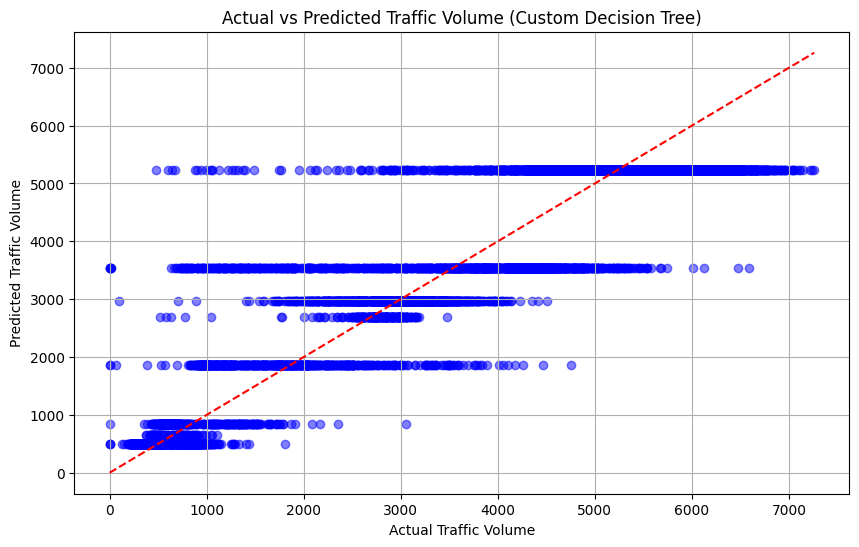

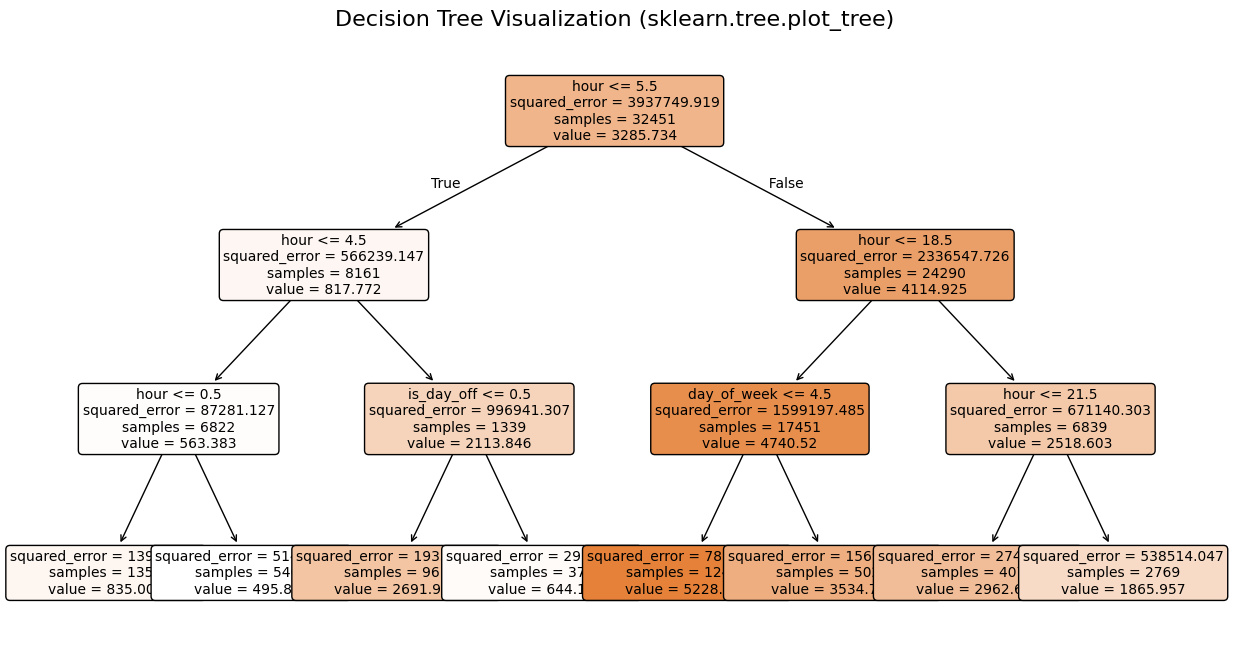

In [156]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Custom Decision Tree Regressor Implementation (your provided code)
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return Node(value=np.mean(y))
        best_feature, best_thresh = self._best_criteria(X, y, n_features)
        if best_feature is None or best_thresh is None:
            return Node(value=np.mean(y))
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return Node(value=np.mean(y))
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(feature=best_feature, threshold=best_thresh, left=left, right=right)

    def _best_criteria(self, X, y, n_features):
        best_mse = float("inf")
        best_feature = None
        best_threshold = None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                mse = self._calculate_mse(y, X[:, feature], threshold)
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _calculate_mse(self, y, X_column, threshold):
        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return float("inf")
        left_mse = np.var(y[left_idxs]) * len(left_idxs)
        right_mse = np.var(y[right_idxs]) * len(right_idxs)
        mse = (left_mse + right_mse) / len(y)
        return mse

    def _split(self, X_column, threshold):
        left_idxs = np.argwhere(X_column <= threshold).flatten()
        right_idxs = np.argwhere(X_column > threshold).flatten()
        return left_idxs, right_idxs

    def predict(self, X):
        return np.array([self._predict(sample, self.root) for sample in X])

    def _predict(self, sample, node):
        if node.value is not None:
            return node.value
        feature_val = sample[node.feature]
        if feature_val <= node.threshold:
            return self._predict(sample, node.left)
        else:
            return self._predict(sample, node.right)

# Load and preprocess the dataset
df = pd.read_csv('preprocessed_data2.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.drop(['date_time'], axis=1)

boolean_cols = ['weather_main_Clouds', 'weather_main_Clear', 'weather_main_Rain', 
                'weather_main_Drizzle', 'weather_main_Mist', 'weather_main_Haze', 
                'weather_main_Fog', 'weather_main_Thunderstorm', 'weather_main_Snow', 
                'weather_main_Squall', 'weather_main_Smoke', 'is_day_off']
df[boolean_cols] = df[boolean_cols].astype(int)

X = df.drop(['traffic_volume'], axis=1).to_numpy()
y = df['traffic_volume'].to_numpy()

# Train-test split
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the custom Decision Tree
custom_tree = DecisionTreeRegressor(max_depth=3, min_samples_split=2)
custom_tree.fit(X_train_np, y_train_np)
y_pred_tree = custom_tree.predict(X_test_np)

# Evaluation
def evaluate_model(y_true, y_pred, threshold=70):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    accuracy_within_threshold = np.mean(np.abs(y_true - y_pred) <= threshold) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Accuracy within ±{threshold}: {accuracy_within_threshold:.2f}%")
    print(f"R-squared (R²): {r2:.2f}")

evaluate_model(y_test_np, y_pred_tree)

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred_tree, alpha=0.5, color='blue')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], '--r')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume (Custom Decision Tree)')
plt.grid(True)
plt.show()


from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and preprocess the dataset
df = pd.read_csv('preprocessed_data2.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.drop(['date_time'], axis=1)

boolean_cols = ['weather_main_Clouds', 'weather_main_Clear', 'weather_main_Rain', 
                'weather_main_Drizzle', 'weather_main_Mist', 'weather_main_Haze', 
                'weather_main_Fog', 'weather_main_Thunderstorm', 'weather_main_Snow', 
                'weather_main_Squall', 'weather_main_Smoke', 'is_day_off']
df[boolean_cols] = df[boolean_cols].astype(int)

X = df.drop(['traffic_volume'], axis=1).to_numpy()
y = df['traffic_volume'].to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the sklearn DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, min_samples_split=2, random_state=42)
tree.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=df.drop(['traffic_volume'], axis=1).columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (sklearn.tree.plot_tree)", fontsize=16)
plt.show()



# abhilash Random Forest with removing least related data

In [157]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib  # Import joblib for saving/loading the model

class DecisionTreeRegressor:
    """
    A basic Decision Tree Regressor for use in the Random Forest.
    """

    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        """
        Fits the decision tree to the data.
        """
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        """
        Recursive function to build the decision tree.
        """
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)  # Return the mean value as the prediction

        # Find the best feature and threshold to split on
        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.mean(y)  # No valid split found

        # Split the data into left and right subsets
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the left and right subtrees
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        # Return the tree structure as a dictionary
        return {"feature": best_feature, "threshold": best_threshold,
                "left": left_tree, "right": right_tree}

    def _find_best_split(self, X, y):
        """
        Finds the best feature and threshold to split the data on.
        """
        best_feature = None
        best_threshold = None
        best_mse = float('inf')  # Initialize with a very large MSE

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                # Compute the mean squared error (MSE) for the split
                left_mse = np.mean((y[left_indices] - np.mean(y[left_indices]))**2)
                right_mse = np.mean((y[right_indices] - np.mean(y[right_indices]))**2)
                mse = (len(y[left_indices]) * left_mse + len(y[right_indices]) * right_mse) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, X):
        """
        Predicts the target value for a given input.
        """
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _predict_row(self, row, tree):
        """
        Predicts the target value for a single row of input.
        """
        if isinstance(tree, dict):
            feature = tree['feature']
            threshold = tree['threshold']
            if row[feature] <= threshold:
                return self._predict_row(row, tree['left'])
            else:
                return self._predict_row(row, tree['right'])
        else:
            return tree  # Return the leaf value

class RandomForestRegressor:
    """
    A Random Forest Regressor built from scratch.
    """

    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features  # Number of features to consider for each split
        self.trees = []

    def fit(self, X, y):
        """
        Fits the random forest to the data using bagging.
        """
        self.trees = []
        X = X.to_numpy()  # Convert to NumPy array for compatibility
        y = y.to_numpy()  # Convert to NumPy array for compatibility
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]

            # Create a new decision tree and fit it on the bootstrap sample
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """
        Predicts the target value by averaging predictions from all trees.
        """
        X = X.to_numpy()  # Ensure input is a NumPy array
        predictions = np.array([tree.predict(X) for tree in self.trees])  # Collect predictions from all trees
        return np.mean(predictions, axis=0)  # Take the mean of the predictions

    def save_model(self, filename):
        """
        Save the model to a file using joblib.
        """
        joblib.dump(self, filename)
        print(f"Model saved to {filename}")

    @staticmethod
    def load_model(filename):
        """
        Load a saved model from a file using joblib.
        """
        return joblib.load(filename)

# Example Usage:
# Assuming 'cf' is your preprocessed DataFrame containing the traffic dataset
X1 = cf.drop(['traffic_volume', 'date_time','snow_1h','month','rain_1h','holiday_bool'], axis=1)  # Features
y1 = cf['traffic_volume']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize and train the custom Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, max_depth=5)
rf.fit(X_train, y_train)

# Save the trained model to a file
rf.save_model('random_forest_model_After_removing_least_related_features.pkl')

# Load the saved model from the file (if needed for inference later)
rf_loaded = RandomForestRegressor.load_model('random_forest_model_After_removing_least_related_features.pkl')

# Make predictions using the loaded model
y_pred = rf_loaded.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

def evaluate_model(y_true, y_pred, threshold=70):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    accuracy_within_threshold = np.mean(np.abs(y_true - y_pred) <= threshold) * 100
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Accuracy within ±{threshold}: {accuracy_within_threshold:.2f}%")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Explained Variance Score: {explained_variance:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Assuming y_test_np and y_pred_tree are your true and predicted values:
evaluate_model(y_test, y_pred)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Model saved to random_forest_model_After_removing_least_related_features.pkl
Mean Absolute Error (MAE): 366.78
Mean Squared Error (MSE): 335269.12
Root Mean Squared Error (RMSE): 579.02
Accuracy within ±70: 21.31%
R-squared (R²): 0.91
Explained Variance Score: 0.91
Mean Absolute Percentage Error (MAPE): inf%
Mean Squared Error: 335269.1150238383
R-squared (R2) Score: 0.9149473258744559


# Model from SklearnLib 

In [158]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your preprocessed data is in a DataFrame named 'df'
# Split features (X) and target variable (y)
X = cf.drop(['traffic_volume', 'date_time'], axis=1)  # Drop target and non-numerical features
y = cf['traffic_volume']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 241120.8390382545
R-squared (R2) Score: 0.9388313112404038


# Our Model Random forest regressor 

In [159]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib  # Import joblib for saving/loading the model

class DecisionTreeRegressor:
    """
    A basic Decision Tree Regressor for use in the Random Forest.
    """

    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        """
        Fits the decision tree to the data.
        """
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        """
        Recursive function to build the decision tree.
        """
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)  # Return the mean value as the prediction

        # Find the best feature and threshold to split on
        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.mean(y)  # No valid split found

        # Split the data into left and right subsets
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the left and right subtrees
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        # Return the tree structure as a dictionary
        return {"feature": best_feature, "threshold": best_threshold,
                "left": left_tree, "right": right_tree}

    def _find_best_split(self, X, y):
        """
        Finds the best feature and threshold to split the data on.
        """
        best_feature = None
        best_threshold = None
        best_mse = float('inf')  # Initialize with a very large MSE

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                # Compute the mean squared error (MSE) for the split
                left_mse = np.mean((y[left_indices] - np.mean(y[left_indices]))**2)
                right_mse = np.mean((y[right_indices] - np.mean(y[right_indices]))**2)
                mse = (len(y[left_indices]) * left_mse + len(y[right_indices]) * right_mse) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, X):
        """
        Predicts the target value for a given input.
        """
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _predict_row(self, row, tree):
        """
        Predicts the target value for a single row of input.
        """
        if isinstance(tree, dict):
            feature = tree['feature']
            threshold = tree['threshold']
            if row[feature] <= threshold:
                return self._predict_row(row, tree['left'])
            else:
                return self._predict_row(row, tree['right'])
        else:
            return tree  # Return the leaf value

class RandomForestRegressor:
    """
    A Random Forest Regressor built from scratch.
    """

    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features  # Number of features to consider for each split
        self.trees = []

    def fit(self, X, y):
        """
        Fits the random forest to the data using bagging.
        """
        self.trees = []
        X = X.to_numpy()  # Convert to NumPy array for compatibility
        y = y.to_numpy()  # Convert to NumPy array for compatibility
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]

            # Create a new decision tree and fit it on the bootstrap sample
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """
        Predicts the target value by averaging predictions from all trees.
        """
        X = X.to_numpy()  # Ensure input is a NumPy array
        predictions = np.array([tree.predict(X) for tree in self.trees])  # Collect predictions from all trees
        return np.mean(predictions, axis=0)  # Take the mean of the predictions

    def save_model(self, filename):
        """
        Save the model to a file using joblib.
        """
        joblib.dump(self, filename)
        print(f"Model saved to {filename}")

    @staticmethod
    def load_model(filename):
        """
        Load a saved model from a file using joblib.
        """
        return joblib.load(filename)

# Example Usage:
# Assuming 'cf' is your preprocessed DataFrame containing the traffic dataset
X = cf.drop(['traffic_volume', 'date_time'], axis=1)  # Features
y = cf['traffic_volume']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the custom Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, max_depth=5)
rf.fit(X_train, y_train)

# Save the trained model to a file
rf.save_model('random_forest_model.pkl')

# Load the saved model from the file (if needed for inference later)
rf_loaded = RandomForestRegressor.load_model('random_forest_model.pkl')

# Make predictions using the loaded model
y_pred = rf_loaded.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")




Model saved to random_forest_model.pkl
Mean Squared Error: 334315.18032715854
R-squared (R2) Score: 0.9151893245950597


In [160]:
import numpy as np

In [161]:
# Load the saved model from the .pkl file
import pickle

with open('random_forest_model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

# Select the first row (or any specific row) of your feature set
x1 = X.iloc[1]  # Selecting the first row (can be any row, just replace with the desired index)

# Convert x1 to a DataFrame before passing to predict
x1_df = pd.DataFrame([x1])  # Convert the row into a DataFrame
print(x1_df)
# Predict the traffic volume for the selected sample
y1 = rf_loaded.predict(x1_df)  # Pass the DataFrame directly

# Output the prediction
print(f"Predicted traffic volume for the sample: {y1[0]}")


   rain_1h  snow_1h  clouds_all  temp_c  weather_main_Clouds  weather_main_Clear  weather_main_Rain  weather_main_Drizzle  weather_main_Mist  weather_main_Haze  weather_main_Fog  weather_main_Thunderstorm  weather_main_Snow  weather_main_Squall  weather_main_Smoke  hour  is_day_off  day_of_week  holiday_bool  month
1      0.0      0.0          75   16.21                 True               False              False                 False              False              False             False                      False              False                False               False    10           0            1             0     10
Predicted traffic volume for the sample: 4794.678119178955


In [162]:
y_residuals=y_test-y_pred

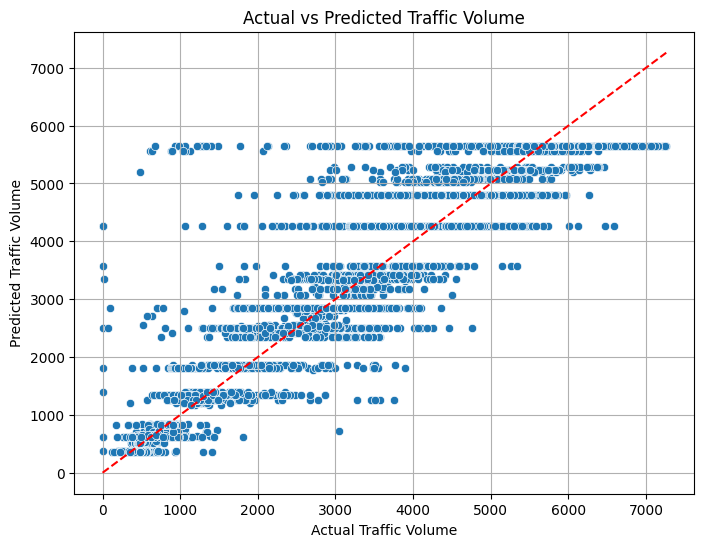

In [163]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.grid()
plt.show()

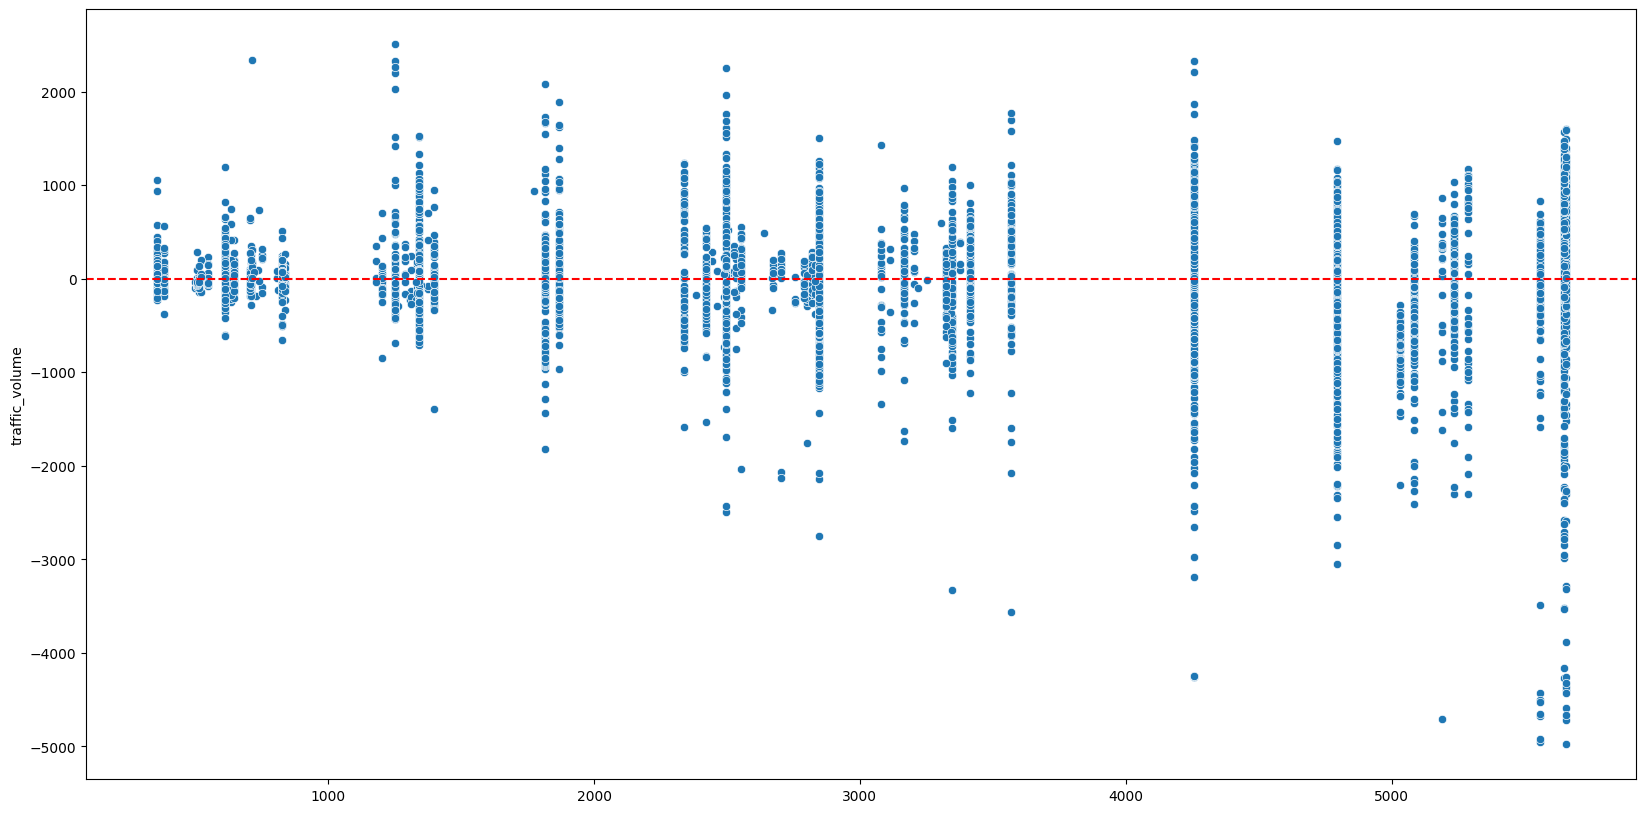

In [164]:
sn.scatterplot(x=y_pred, y=y_residuals)
plt.axhline(0, color='r', linestyle='--')

<Axes: xlabel='traffic_volume', ylabel='Count'>

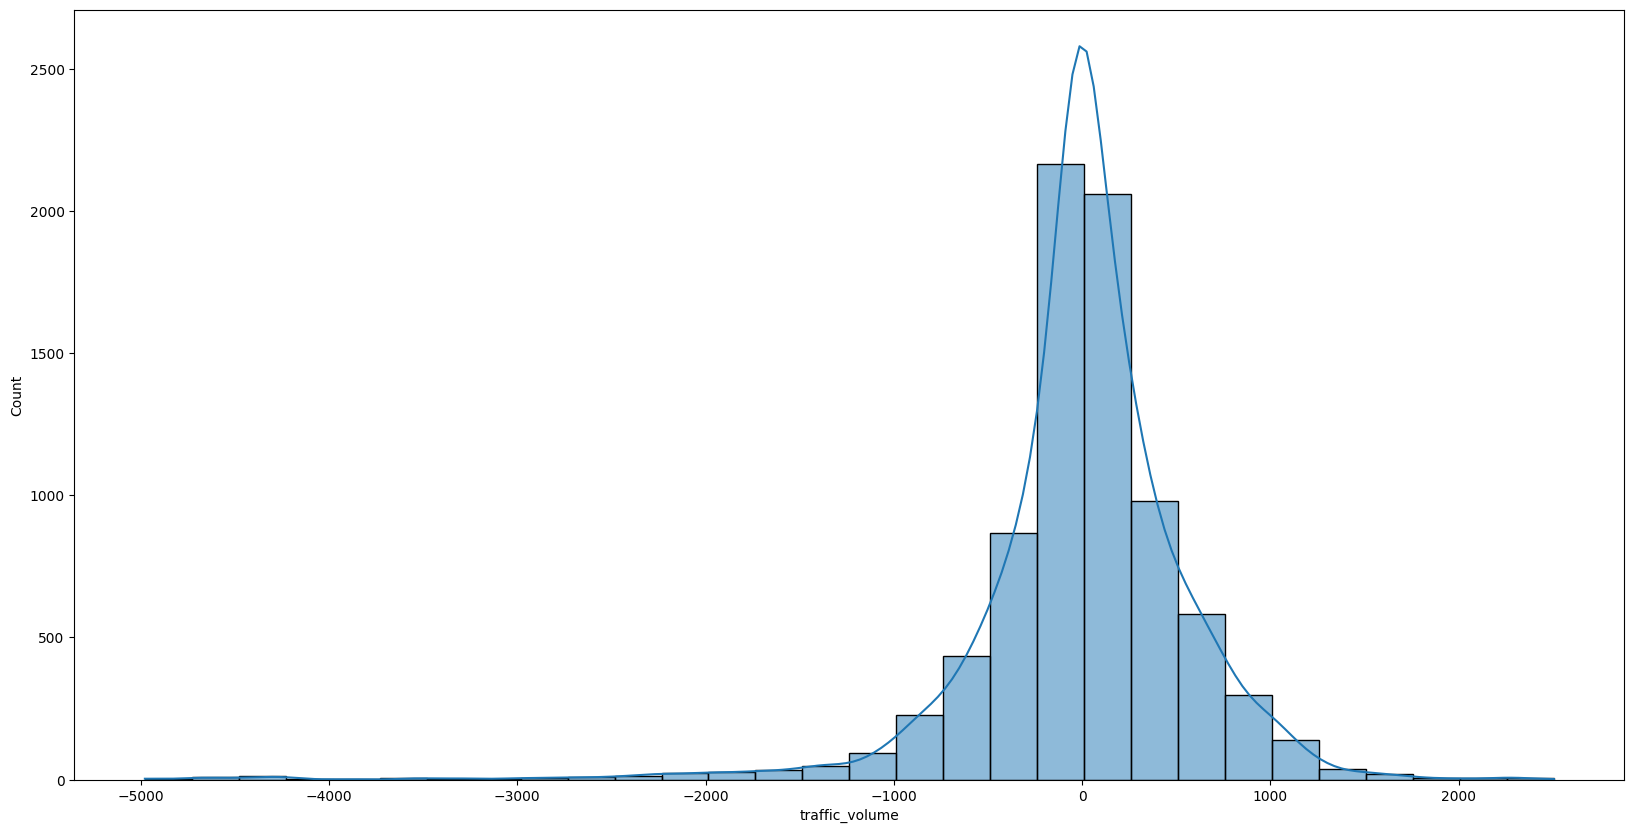

In [165]:
sn.histplot(y_residuals, kde=True, bins=30)

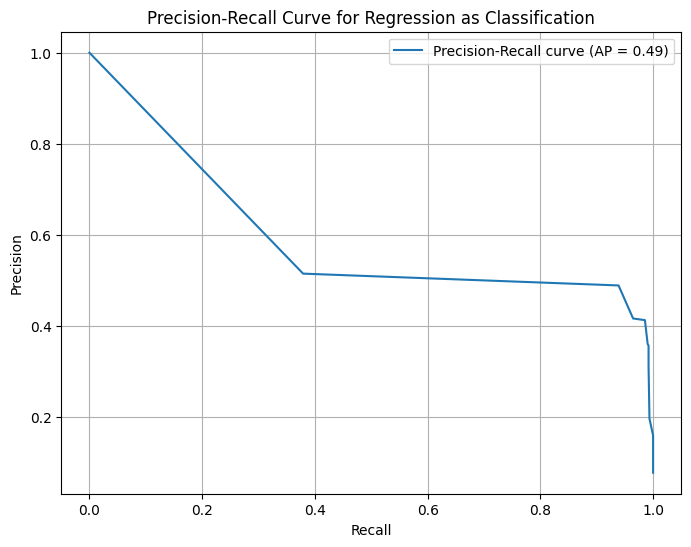

In [180]:
from sklearn.metrics import precision_recall_curve, average_precision_score
threshold = 6000
actual_class = (y_test >= threshold).astype(int)  # Binary classification: 1 = high traffic, 0 = low traffic
predicted_scores = y_pred  # Regression predictions as scores

# Calculate precision, recall, and thresholds
precision, recall, pr_thresholds = precision_recall_curve(actual_class, predicted_scores)
average_precision = average_precision_score(actual_class, predicted_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Regression as Classification')
plt.legend()
plt.grid()
plt.show()

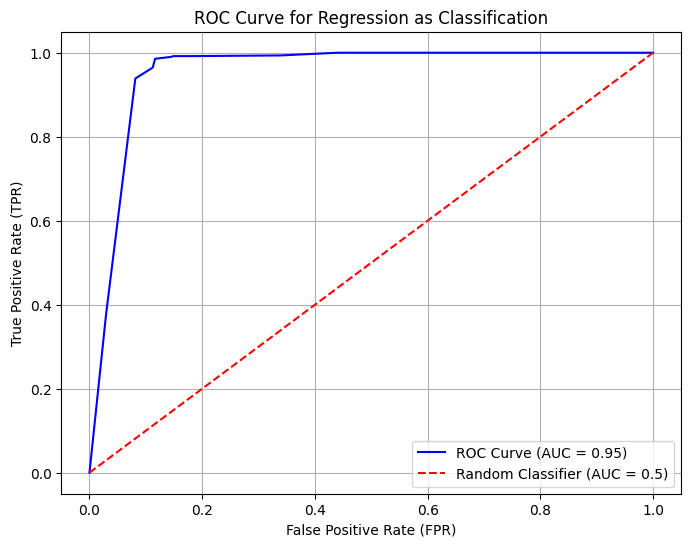

In [181]:
from sklearn.metrics import roc_curve, auc
# Compute ROC Curve
fpr, tpr, roc_thresholds = roc_curve(actual_class, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier (AUC = 0.5)")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Regression as Classification')
plt.legend()
plt.grid()
plt.show()

((array([-3.75860122, -3.53051738, -3.40515933, ...,  3.40515933,
          3.53051738,  3.75860122]),
  array([-4977.95171979, -4952.55680651, -4918.55680651, ...,
          2331.69544534,  2334.7508714 ,  2506.44345249])),
 (np.float64(534.0982774558544),
  np.float64(2.960595925329323),
  np.float64(0.9233390034338075)))

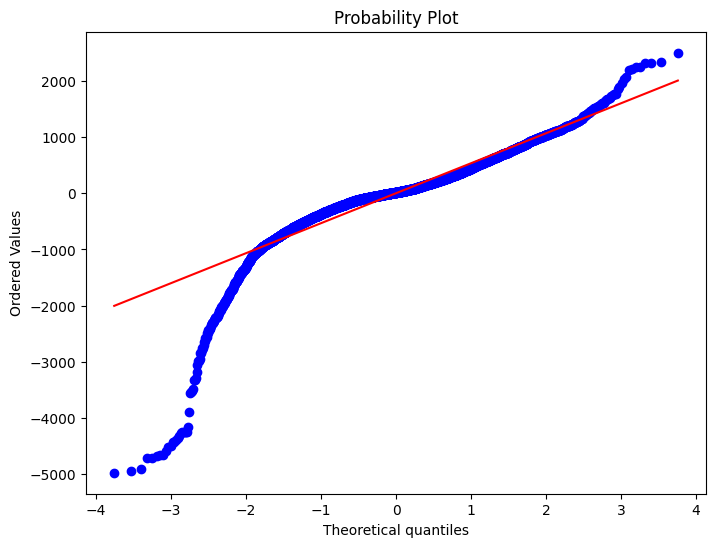

In [182]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(y_residuals, dist="norm", plot=plt)
